## Comparision Plots - GF, CSS, and DNM For A1 and LBelt

In [1]:

%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from vis import basic_plot
import numpy as np
from vis import zoom_to_multiple_rois, basic_plot


/tank/oso210/projects/Tonotopy_2021/utils.py:21: UserWarning: 

 | Using Nistats with Nilearn versions >= 0.7.0 is redundant and potentially conflicting.
 | Nilearn versions 0.7.0 and up offer all the functionality of Nistats as well the latest features and fixes.
 | We strongly recommend uninstalling Nistats and using Nilearn's stats & reporting modules.

  from nistats.hemodynamic_models import spm_hrf, spm_time_derivative, spm_dispersion_derivative


## 1.  Plottings are for regions A1 and LBelt.

In [2]:
css = np.load('saved_model_params/css_A1_LBelt.npz')
gm = np.load('./saved_model_params/gf_A1_LBelt.npz')
dn = np.load('./saved_model_params/dnm_A1_LBelt.npz')

In [3]:
mask = pd.read_csv('./auditory_A1_LBelt.csv')
mask = np.array(mask['mask']).astype(bool)

## 1. Surface plot for Surround size - center size (for A1 and LBelt)

### For Grid Search

In [20]:
np.max(dn["gridsearch_params"][:, 5]), np.mean(dn["gridsearch_params"][mask][:, 5] - dn["gridsearch_params"][mask][:, 1])
## Just to change the background color
dn_copy_grid = np.copy(dn["gridsearch_params"])
dn_copy_grid[:, 5][~mask] = -2

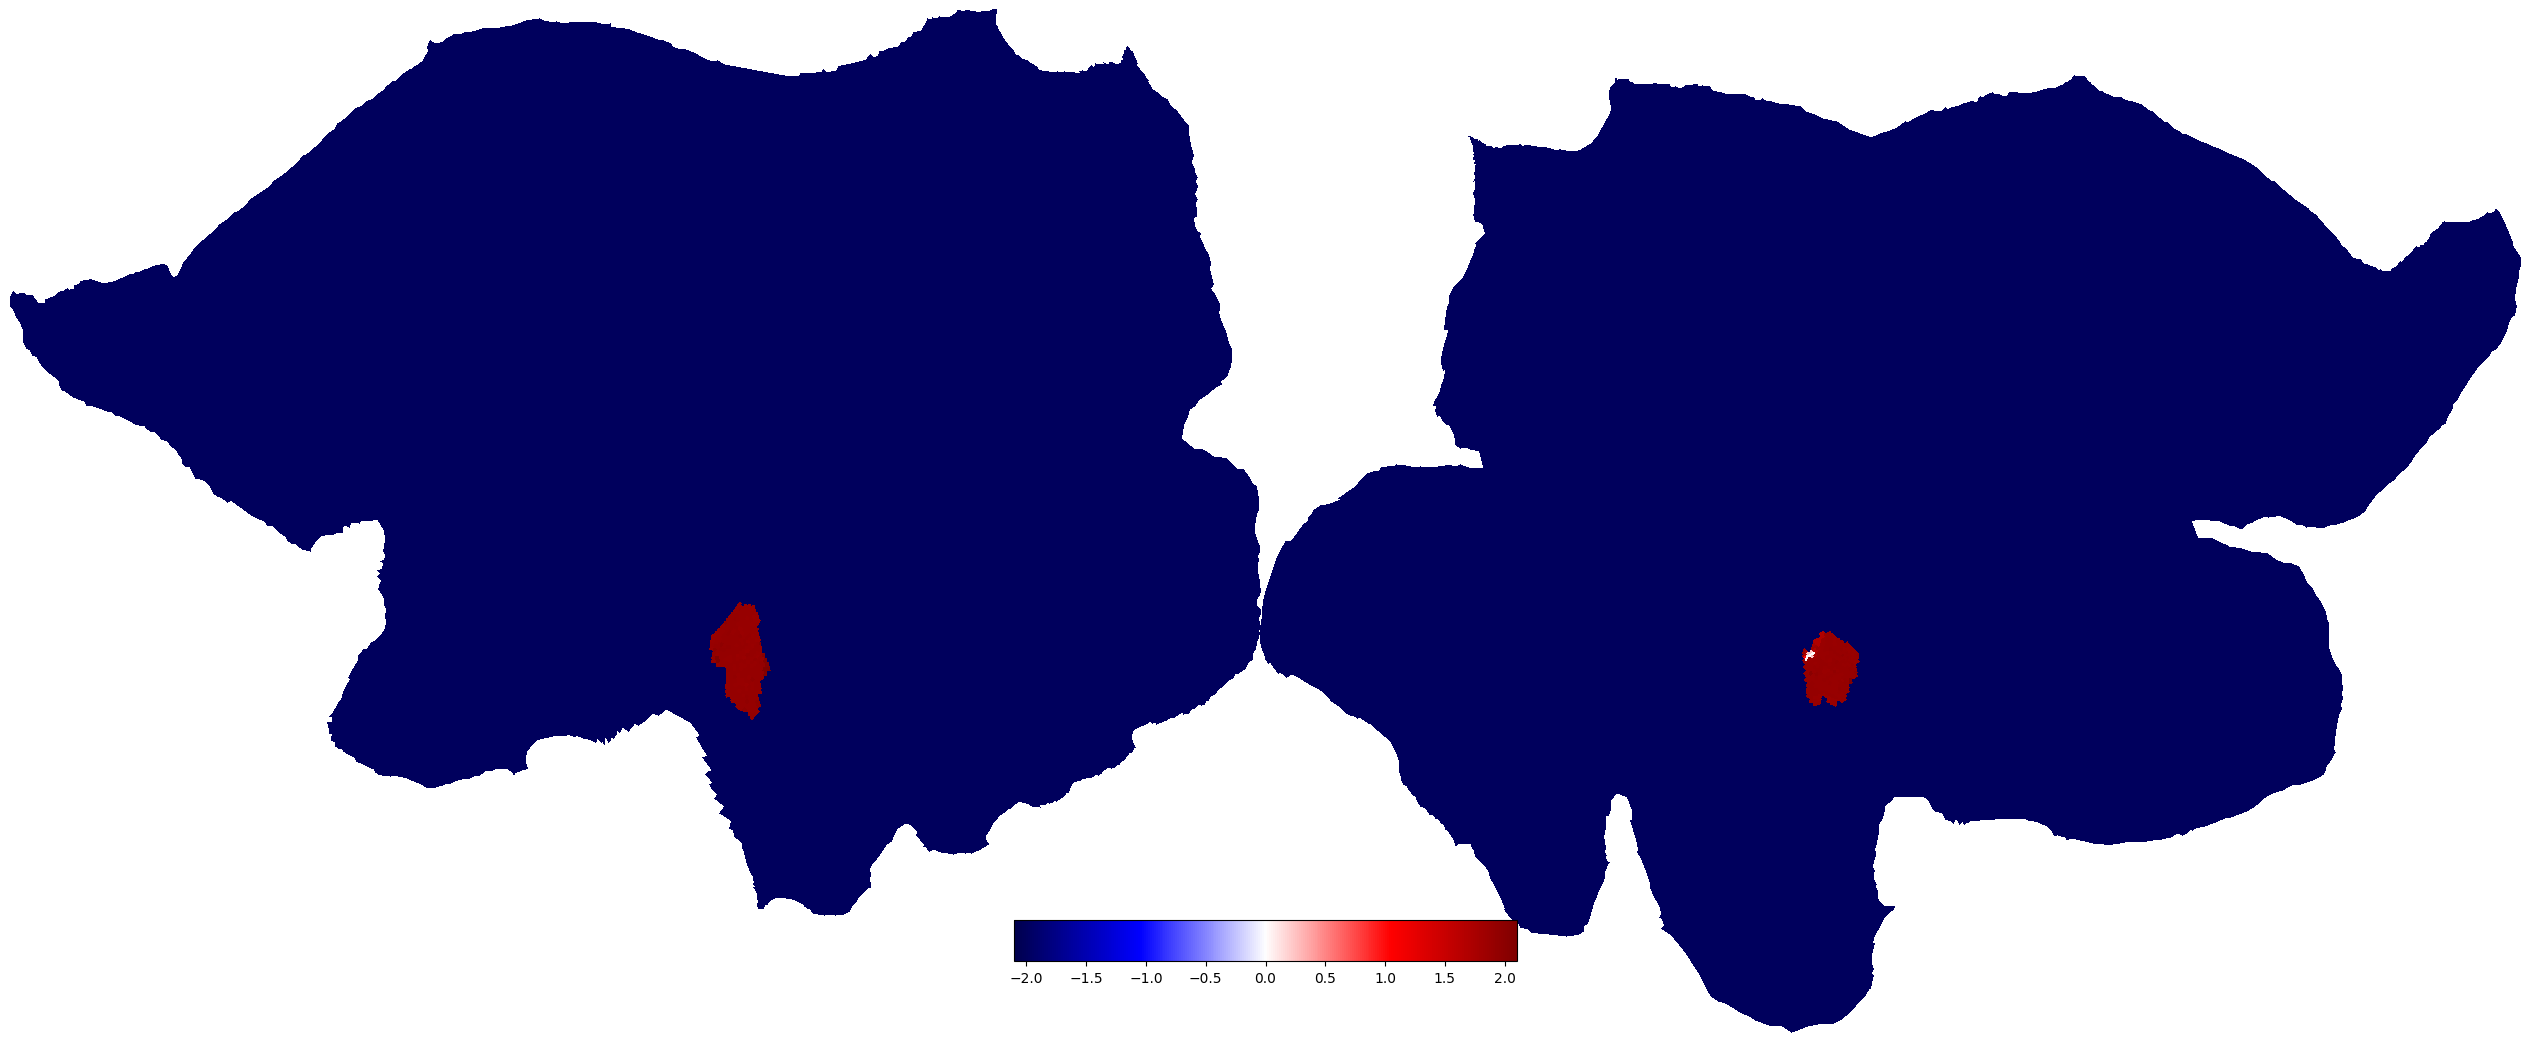

In [21]:
bp=basic_plot(dn_copy_grid[:, 5] - dn_copy_grid[:, 1], colorbar = True,vmin=-2.1, vmax=2.1,cmap='seismic')


As shown in the plotting, also according to the mean of diffrences, for most vertices the diffrence(ss - cs) seems somewhere between 1.5 and 2.0.

### Iterative search

In [ ]:
np.mean(dn["iterative_search_params"][mask][:, 5] - dn["iterative_search_params"][mask][:, 1])

0.021118616535379314

 The mean of the difference between the CS and SS is a very small number. Therefore, to visualize this I am setting the vertices out of the ROI for one of the params a higher number.

In [22]:
dn_copy = np.copy(dn["iterative_search_params"])
dn_copy[:, 5][~mask] = -2

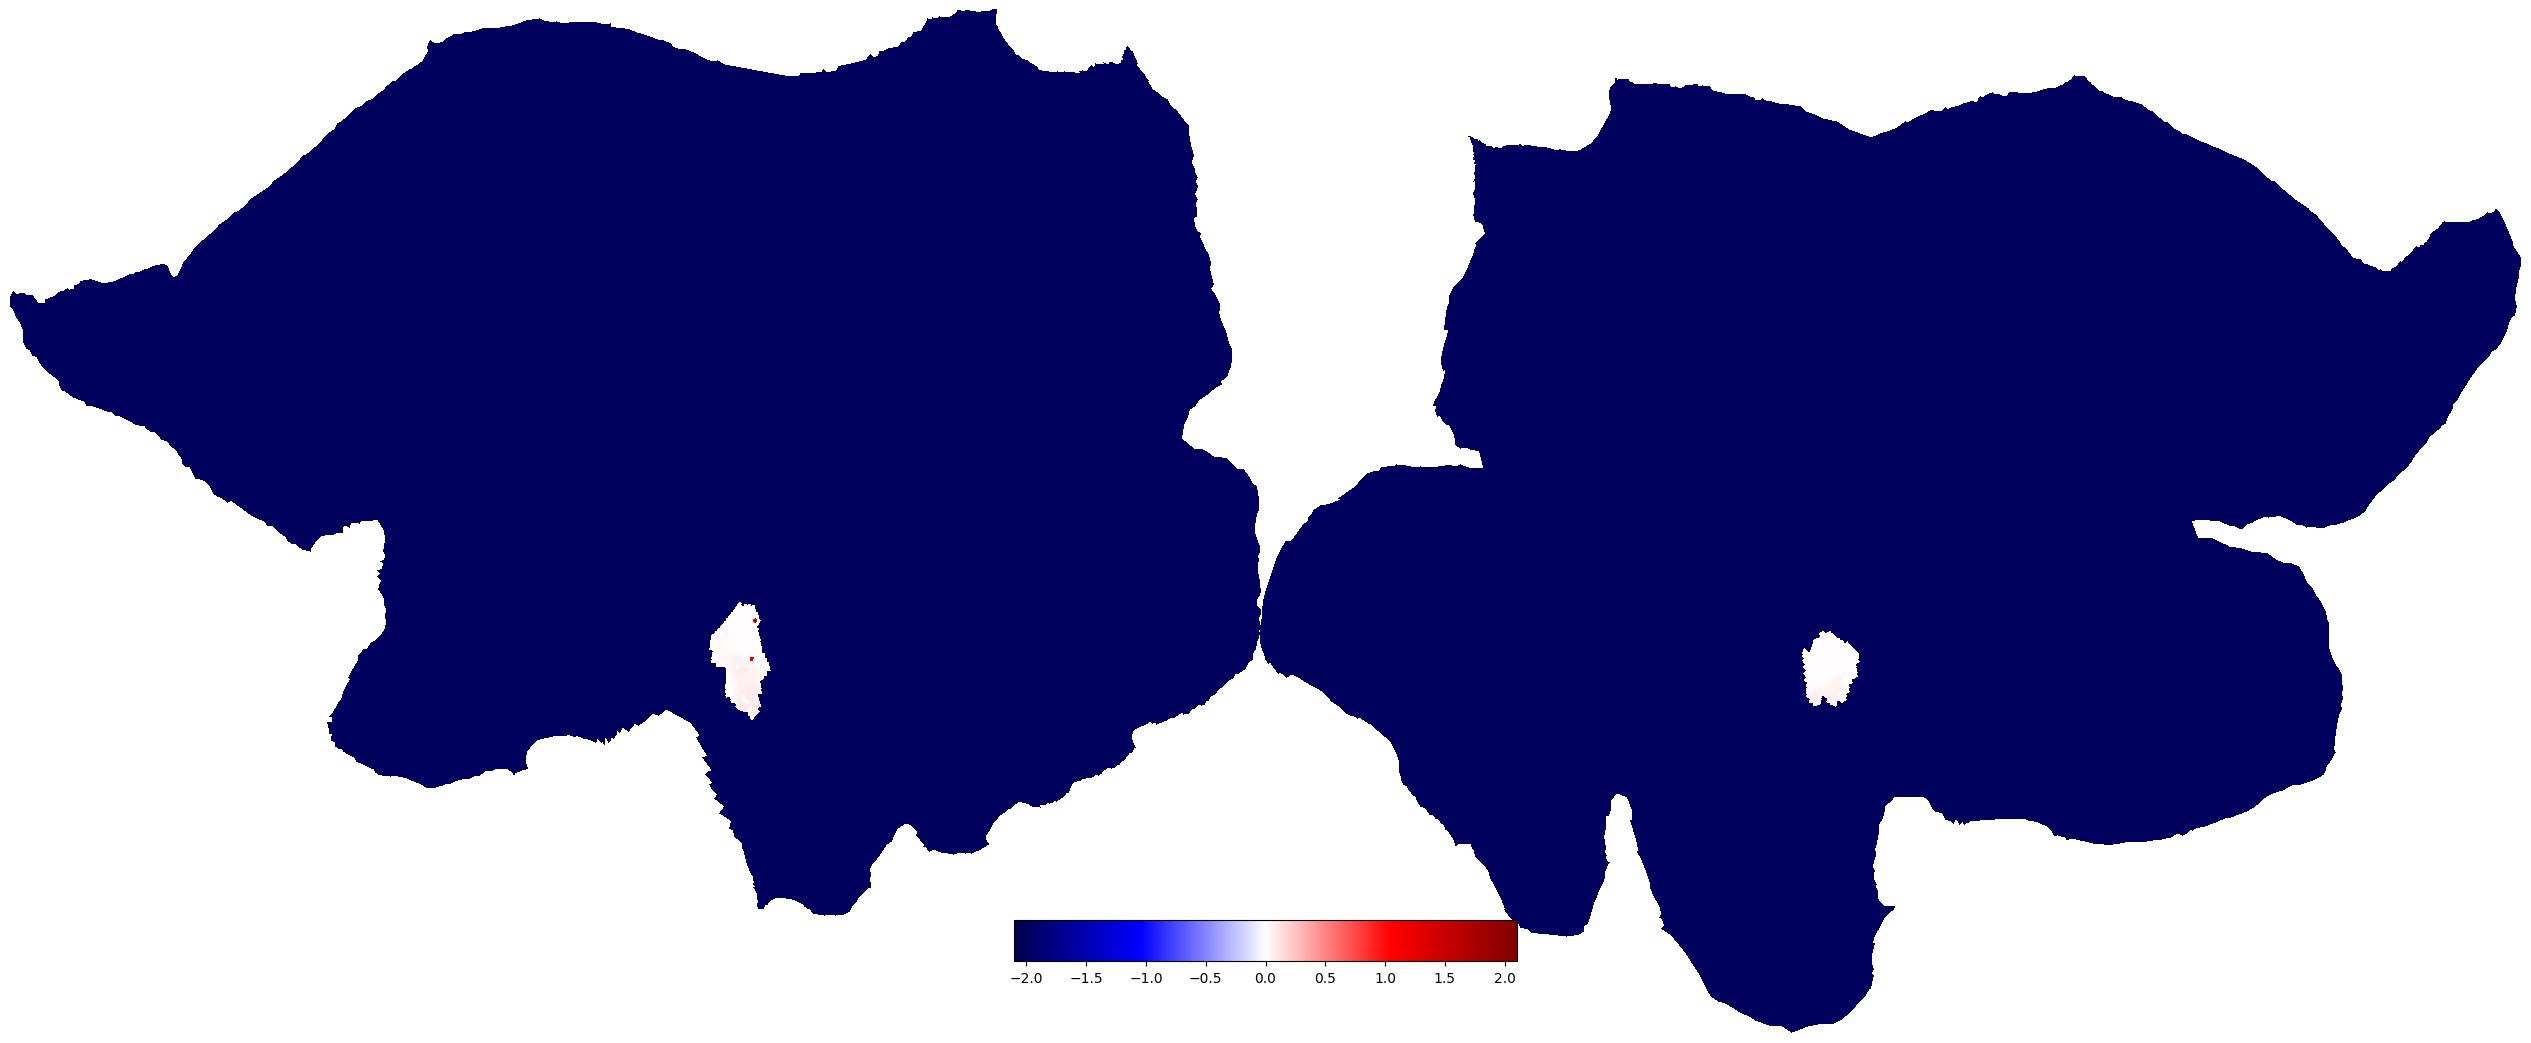

In [24]:
bp=basic_plot(dn_copy[:, 5] - dn_copy[:, 1], colorbar = True,vmin=-2.1, vmax=2.1,cmap='seismic')

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


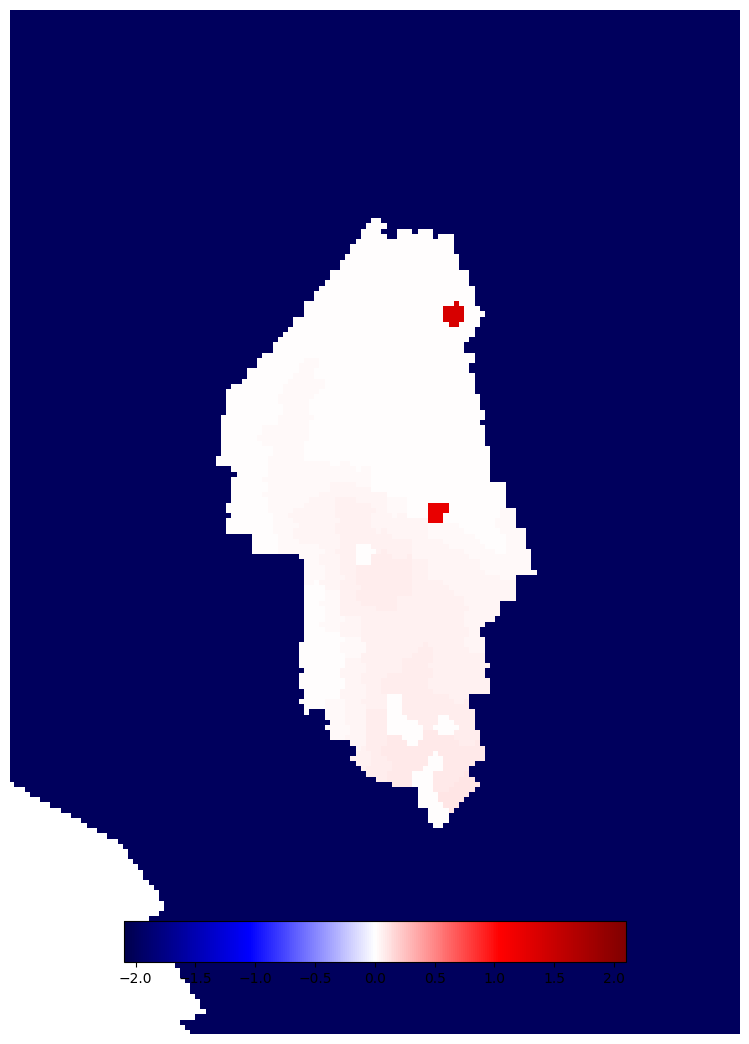

In [26]:

bp=basic_plot(dn_copy[:, 5] - dn_copy[:, 1], colorbar = True,vmin=-2.1, vmax=2.1,cmap='seismic')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

### Let's check correlation for these two variables.
But first, let's see the distribution to decide on a correlation test.

In [ ]:
from scipy.stats import shapiro
alpha = 0.05

stat, p_value_gs_cs = shapiro(dn["gridsearch_params"][mask][:, 1])
stat, p_value_gs_ss = shapiro(dn["gridsearch_params"][mask][:, 5])
p_value_gs_cs>alpha, p_value_gs_ss>alpha

(False, False)

In [ ]:
stat, p_value_cs = shapiro(dn["iterative_search_params"][mask][:, 1])
stat, p_value_ss = shapiro(dn["iterative_search_params"][mask][:, 5])
p_value_cs > alpha, p_value_ss > alpha

(False, False)

##### They all look normaly distributed(both for the iterative and grid fit), so we can do pearson's correlation test in this case.

##### Grid Fit (left) and Iterative fit(right)

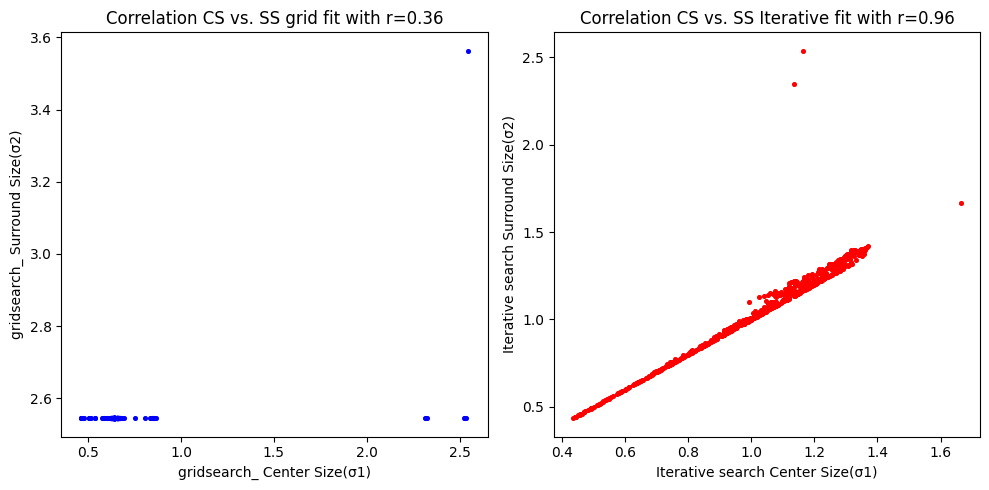

In [ ]:
from scipy.stats import pearsonr

corr_grid, p_value_grid = pearsonr(dn["gridsearch_params"][mask][:, 1], dn["gridsearch_params"][mask][:, 5])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  

plt.scatter(dn["gridsearch_params"][mask][:, 1], dn["gridsearch_params"][mask][:, 5],  s=7, c='blue')
plt.title(f'Correlation CS vs. SS grid fit with r={corr_grid:.2f}')

plt.xlabel('gridsearch_ Center Size(σ1)')
plt.ylabel('gridsearch_ Surround Size(σ2)')


plt.subplot(1, 2, 2)  
corr_iter, p_value_iter = pearsonr(dn["iterative_search_params"][mask][:, 1], dn["iterative_search_params"][mask][:, 5])

plt.scatter(dn["iterative_search_params"][mask][:, 1], dn["iterative_search_params"][mask][:, 5],  s=7, c='red')
plt.title(f'Correlation CS vs. SS Iterative fit with r={corr_iter:.2f}')
plt.xlabel('Iterative search Center Size(σ1)')
plt.ylabel('Iterative search Surround Size(σ2)')
plt.tight_layout()
plt.show()

##### As we can see here there is a huge difference in correlation of the center size and surround size between the grid search and the iterative search parameters.

## 2.  Within set R^2 between CSS and Norm model 

(Note: this R2 are not cross validated, I was saving time by running only one fold, but I will be running all 4 folds now.)

#### Train Set

Difference of R2 for the iterative search for Divisive normalisation vs CSS model.

In [27]:
train_r2_diff = np.copy(dn["iterative_search_params"][:, -1] - css["iterative_search_params"][:, -1])
train_r2_diff[~mask] = -.3

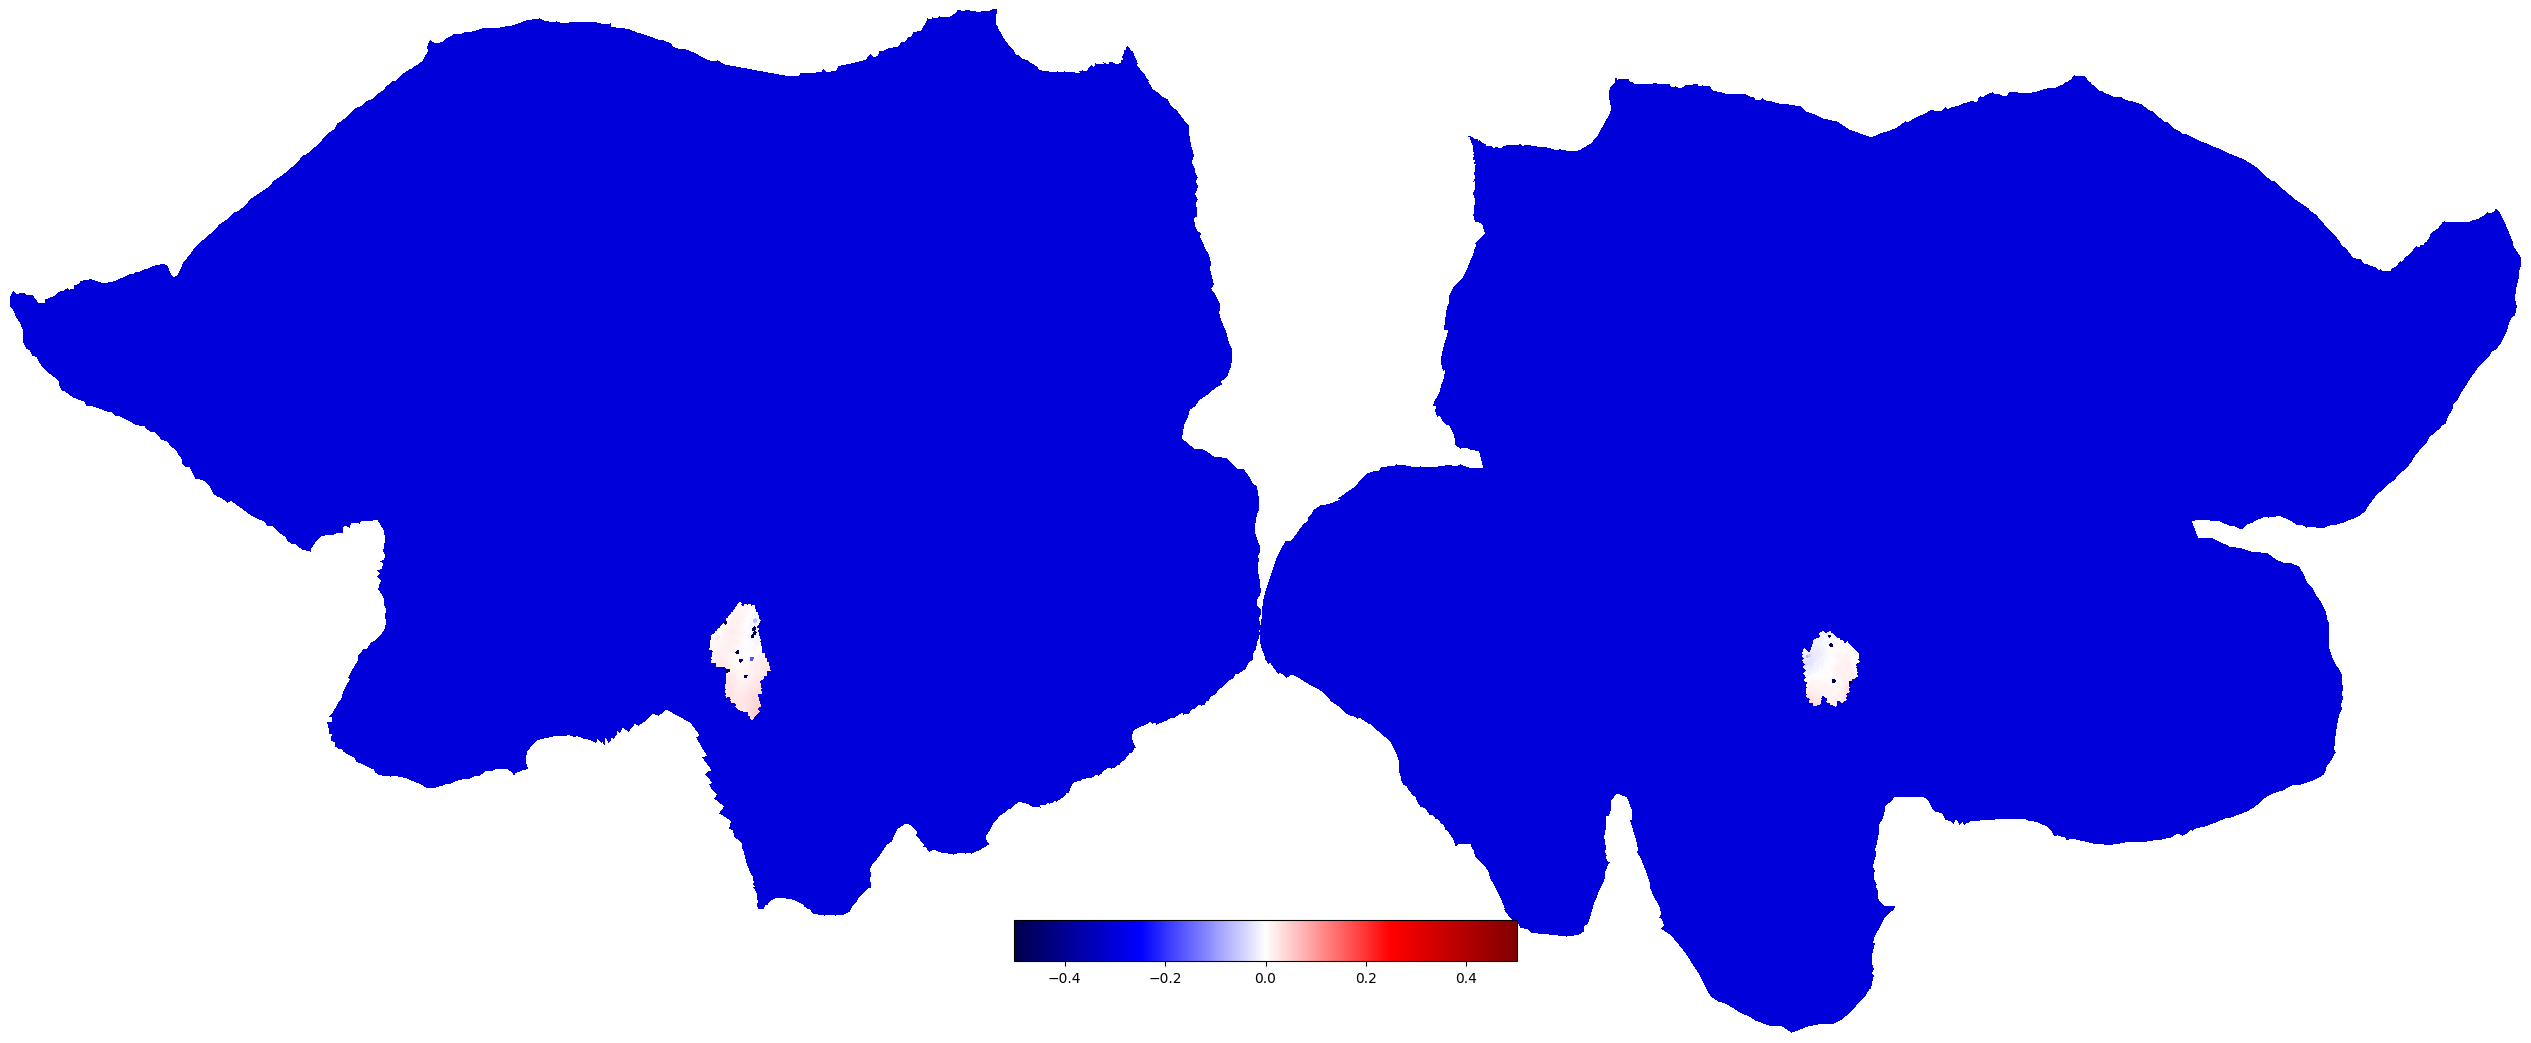

In [30]:
bp=basic_plot(train_r2_diff, colorbar = True, vmin=-.5, vmax=.5,cmap='seismic')

In [ ]:
np.min(train_r2_diff[mask]), np.max(train_r2_diff[mask]), np.mean((train_r2_diff[mask]))

(-0.609868748048631, 0.049199079889240216, -0.0030653819971717083)

In [ ]:
np.sum(train_r2_diff[mask] > 0), np.sum(train_r2_diff[mask] < 0), np.sum(train_r2_diff[mask] == 0)

(456, 170, 0)

The R2 difference for the train set lies in a range of [-0.6099, 0.0492], and out of 626 vertices in this ROI, DN seem to have a higher R2 for majority of them, the group mean and distribution of R2 for both sets(train and test) of the models is shown below after the surface plots.

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


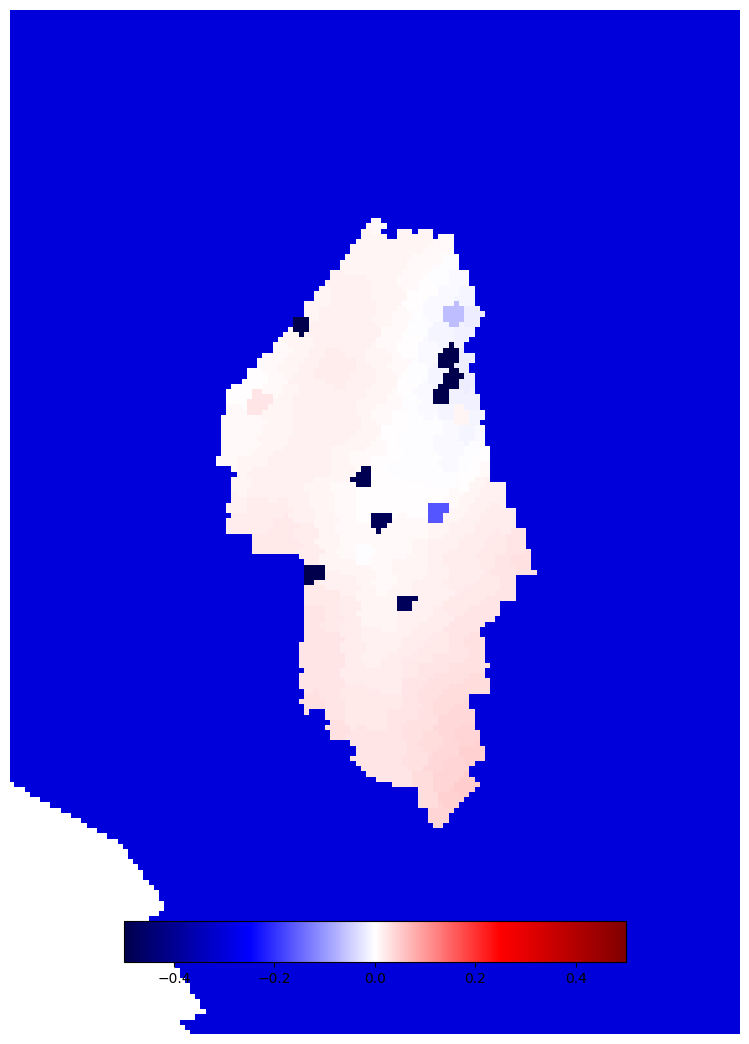

In [32]:
bp=basic_plot(train_r2_diff, colorbar = True, vmin=-.5, vmax=.5,cmap='seismic')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

#### Test Set

Difference in R2 for test set DN vs CSS.

In [37]:
test_r2_diff = np.copy(dn['CV_rsq'] - css['CV_rsq'])
test_r2_diff[~mask] = -.5

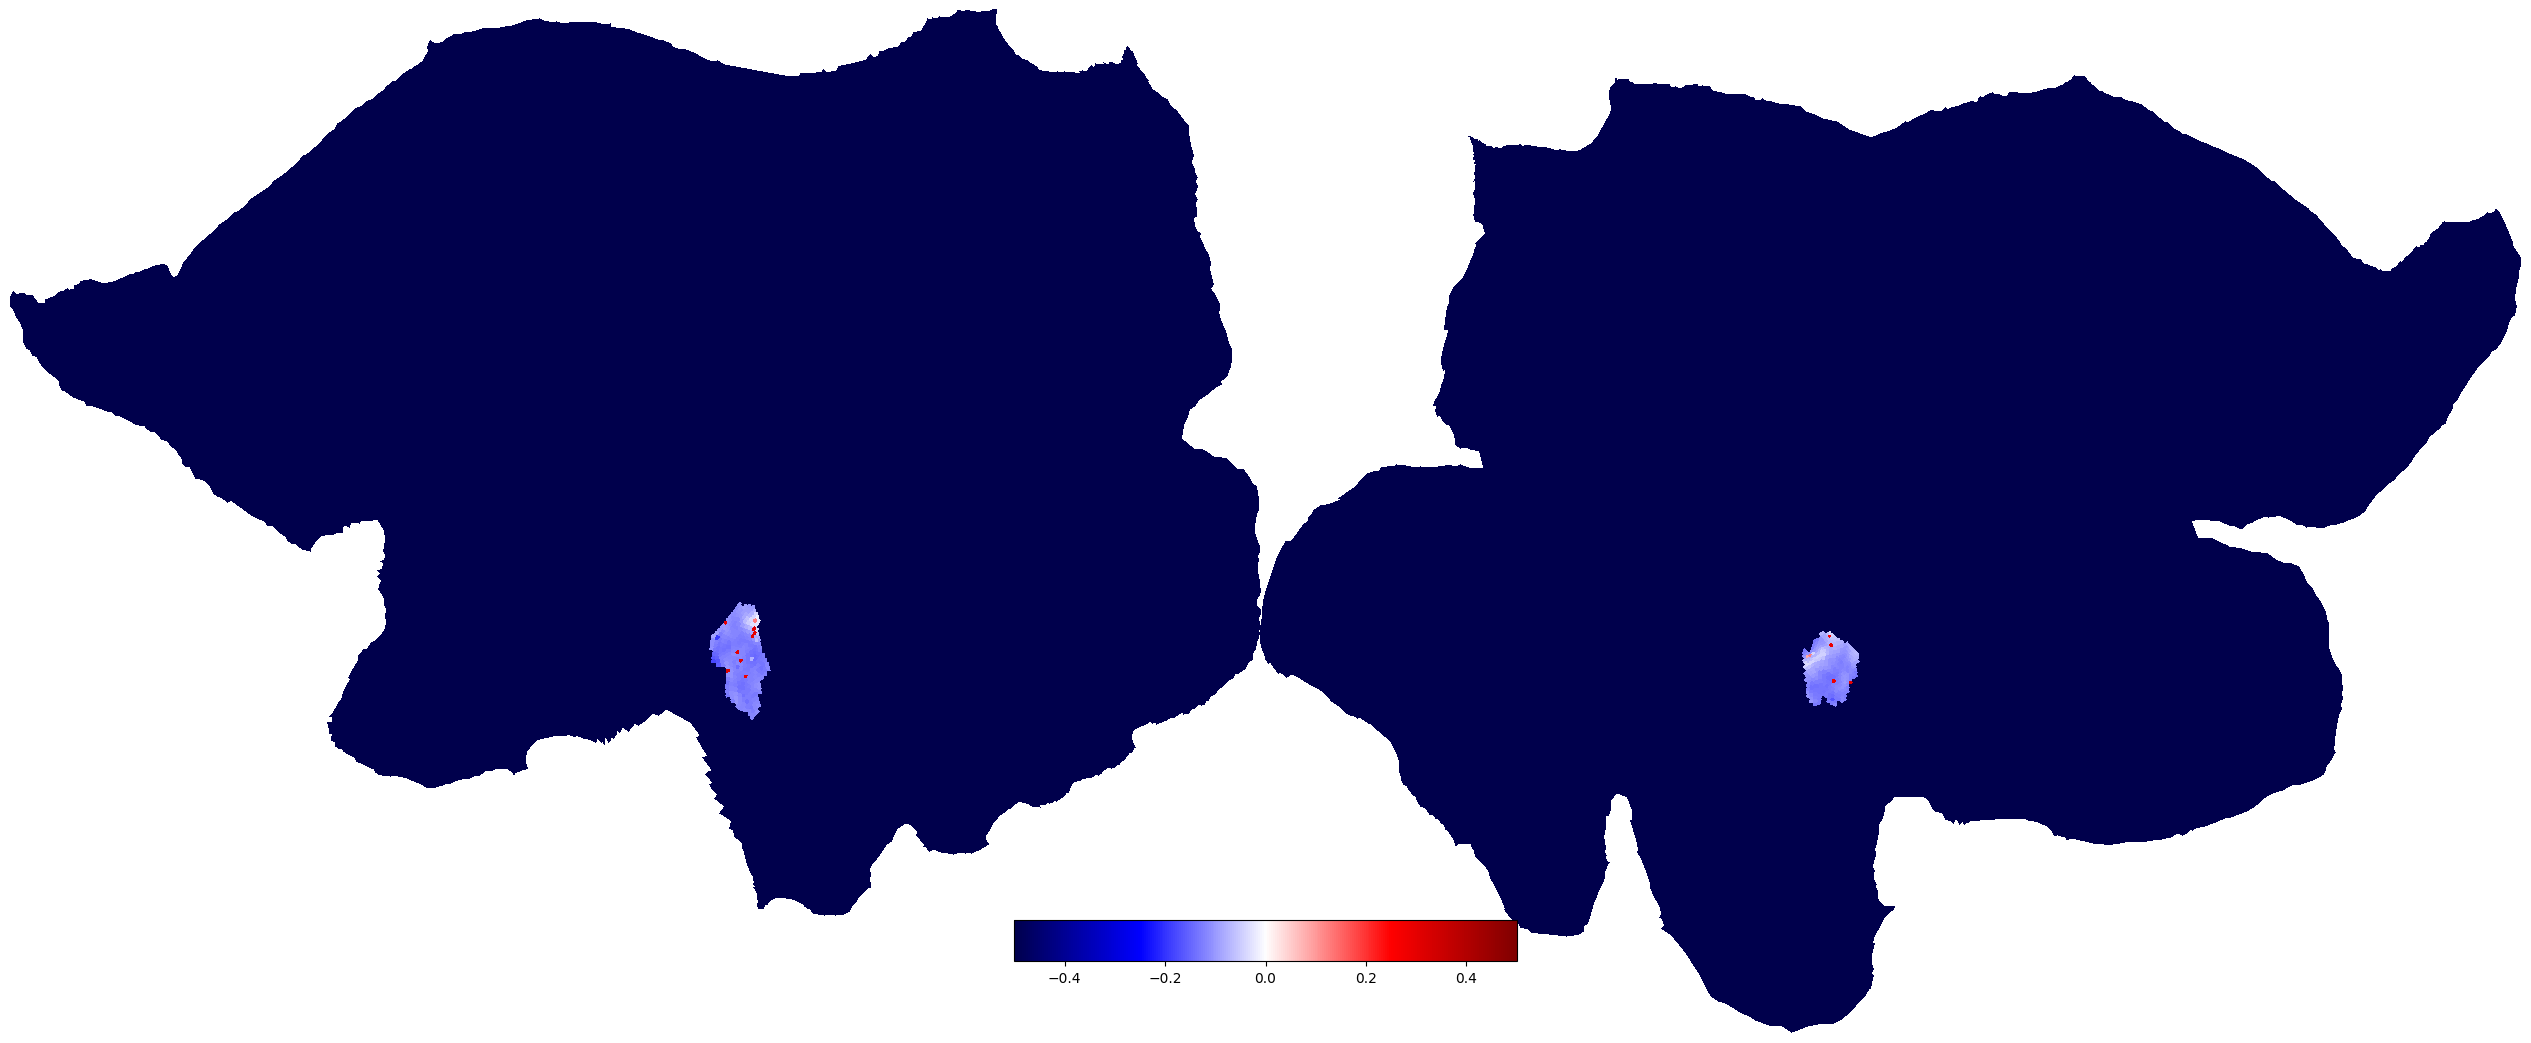

In [38]:
bp=basic_plot(test_r2_diff, colorbar = True, vmin=-.5, vmax=.5,cmap='seismic')

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


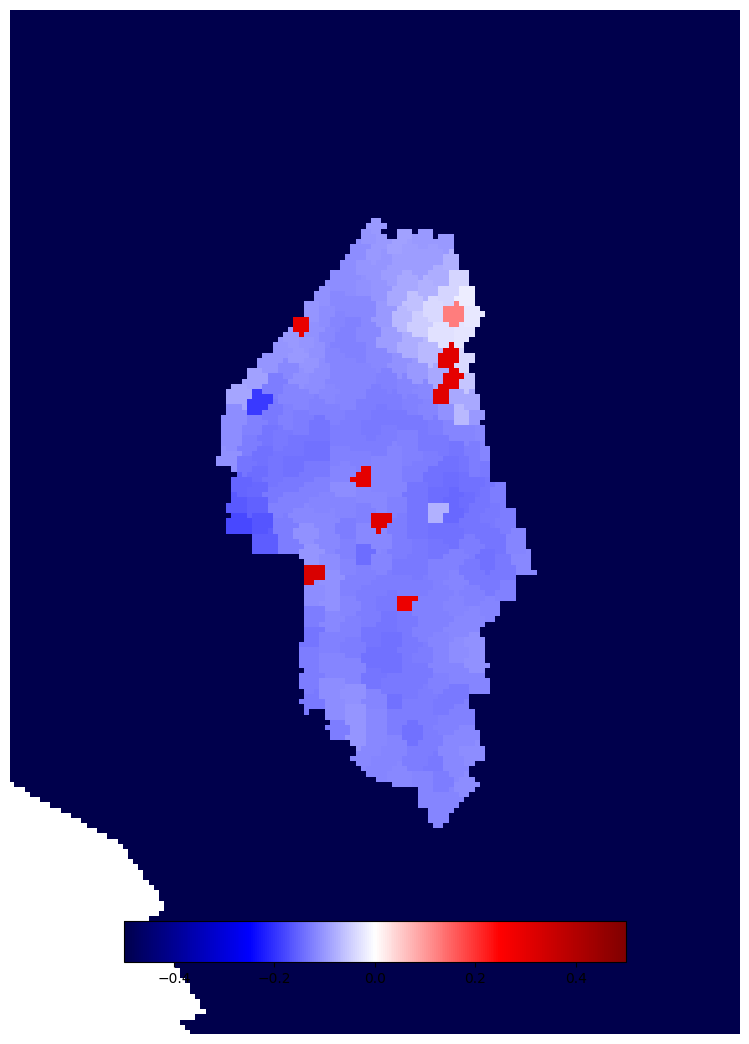

In [39]:
bp=basic_plot(test_r2_diff, colorbar = True, vmin=-.5, vmax=.5,cmap='seismic')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

#### CSS is definitely explaining the data better in this case(for the test set).

### Let's take a look at the distribution of R^2 for both model's train and test sets.

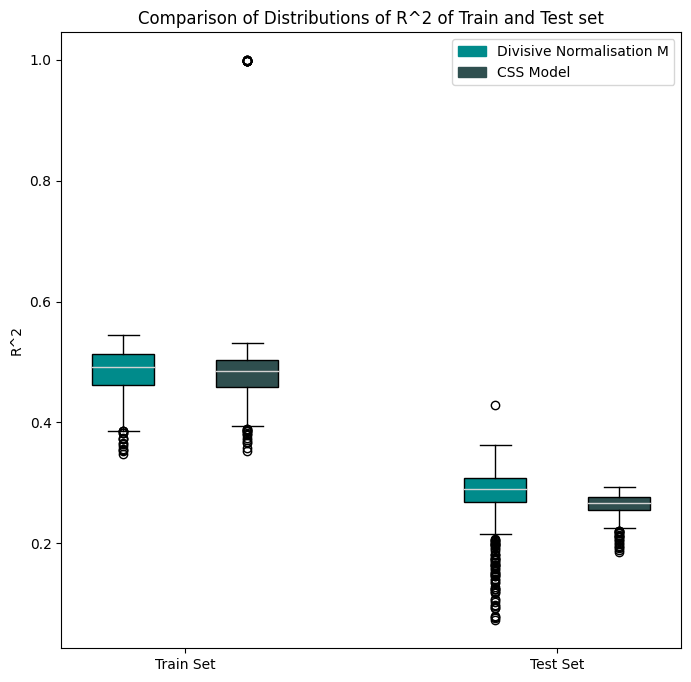

In [65]:
import matplotlib.patches as mpatches

data = [dn["iterative_search_params"][:, -1][mask], css["iterative_search_params"][:, -1][mask], dn['CV_rsq'][mask], css['CV_rsq'][mask]]
colors = ['darkcyan', 'darkslategray', 'darkcyan', 'darkslategray']

fig, ax = plt.subplots(figsize=(8, 8))
bp = ax.boxplot(data, positions=[1, 2, 4, 5], patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=1)
# Custom x-axis labels
ax.set_xticks([1.5, 4.5])
ax.set_xticklabels(['Train Set', 'Test Set'])

ax.set_ylabel('R^2')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

for median in bp['medians']:
    median.set(color='lightgrey', linewidth=1)
plt.title('Comparison of Distributions of R^2 of Train and Test set')

# Add a legend
blue_patch = mpatches.Patch(color='darkcyan', label='Divisive Normalisation M')
orange_patch = mpatches.Patch(color='darkslategray', label='CSS Model')
plt.legend(handles=[blue_patch, orange_patch])
plt.show()


##### From this comparision, it can be seen that Divisive normalisation is doing slightly better than the css model when looking at the mean R2 when looking at the mean/median of R^2 for both groups, but when looking at the distribution of the R2 values, it seems to be skewed towards lower R^2 values, and there is variablity in performance of the DN model(high variance in R^2). May be I should do this separately for the regions and see if that changes anything...



### Let's taka a look at the D parameter(the surround baseline)

In [ ]:
print('SB(param D) for grid fit: ', retrun_stats(dn["gridsearch_params"][mask][:, -2]))
print('SB(param D) for iterative fit: ', retrun_stats(dn["iterative_search_params"][mask][:, -2]))

SB(param D) for grid fit:  Mean: 0.3744408966967473, Median: 0.30000001192092896, Min: 0.10000000149011612, Max: 1.0
SB(param D) for iterative fit:  Mean: 0.18366212124185088, Median: 0.18780383880057122, Min: -5.122777636726533e-05, Max: 0.44336499572435684


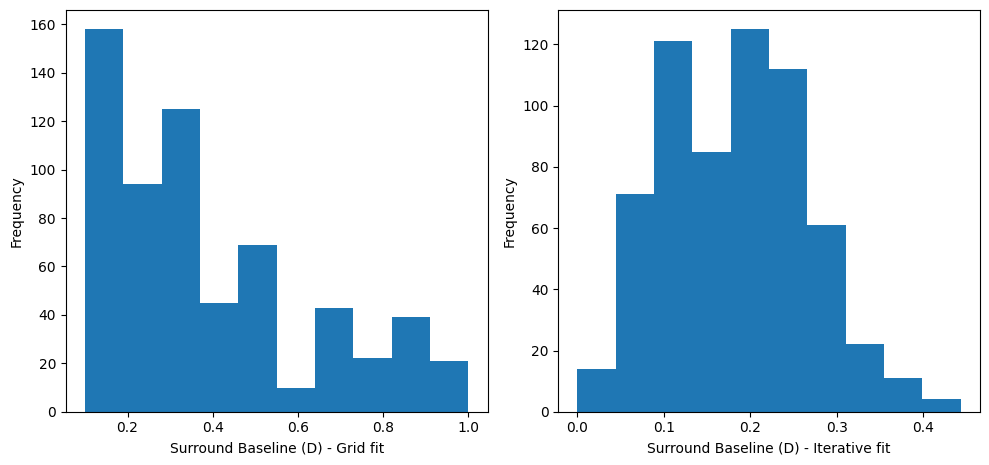

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.hist(dn["gridsearch_params"][mask][:, -2])
plt.xlabel('Surround Baseline (D) - Grid fit')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(dn["iterative_search_params"][mask][:, -2])
plt.xlabel('Surround Baseline (D) - Iterative fit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

#### Yes, the SB(param D) for the iterative fit seem to be cutoff around 0.4.

## 3. Plot of a good-fitting voxel's target data Vs. prediction -- Divisive normalisation model.

Load the subject and the models.... Scroll a bit for the timeseries plots :)

In [124]:
from prfpy.model import Norm_Iso1DGaussianModel

In [125]:
nm=Norm_Iso1DGaussianModel(train_stim,normalise_RFs=False,filter_predictions=True,filter_type='sg',filter_params=my_analysis.fparams)


#### Let's take a look at the correlation between CS and SS with respect to R^2.

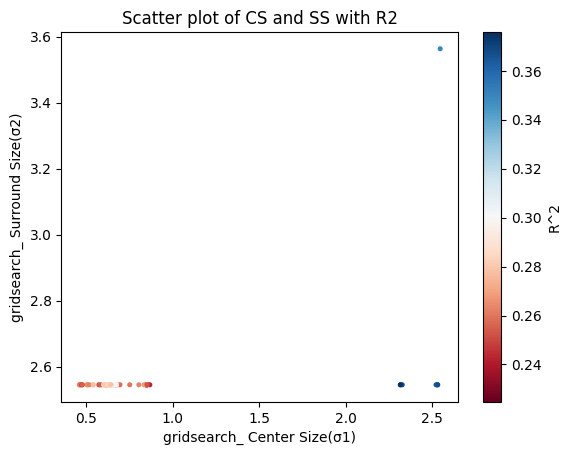

In [154]:

cs_grid = dn['gridsearch_params'][mask][:,1]
ss_grid = dn['gridsearch_params'][mask][:,5]
r2_grid = dn['gridsearch_params'][mask][:, -1]

plt.scatter(cs_grid, ss_grid, c=r2_grid, cmap='RdBu', s=7)
plt.colorbar(label='R^2')
plt.xlabel('gridsearch_ Center Size(σ1)')
plt.ylabel('gridsearch_ Surround Size(σ2)')
plt.title('Scatter plot of CS and SS with R2')
plt.show()


##### Even for the grid fit, vertices with higher R2 values tend to have higher CS, this is why the values of CS and SS are closer on the time sereies since that was for a vertice with highest R2.

#### Let's do the same for the iterative fit, but also let's take a look at the D parameter's relation to this CS and SS correlation.

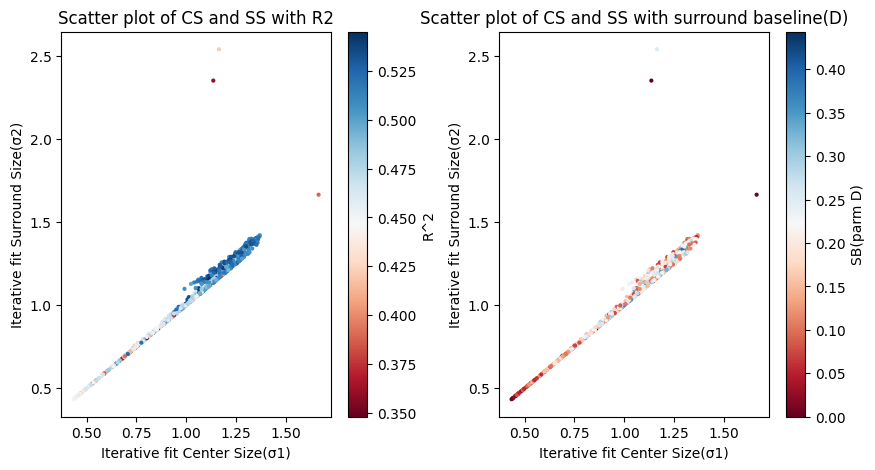

In [158]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

cs_itr = dn['iterative_search_params'][mask][:,1]
ss_itr= dn['iterative_search_params'][mask][:,5]
r2_iter = dn['iterative_search_params'][mask][:, -1]

plt.scatter(cs_itr, ss_itr, c=r2_iter, cmap='RdBu', s=4)
plt.colorbar(label='R^2')
plt.xlabel('Iterative fit Center Size(σ1)')
plt.ylabel('Iterative fit Surround Size(σ2)')
plt.title('Scatter plot of CS and SS with R2')
plt.subplot(1, 2, 2)

cs_itr = dn['iterative_search_params'][mask][:,1]
ss_itr= dn['iterative_search_params'][mask][:,5]
sb_iter = dn['iterative_search_params'][mask][:, -2]

plt.scatter(cs_itr, ss_itr, c=sb_iter, cmap='RdBu', s=4)
plt.colorbar(label='SB(parm D)')
plt.xlabel('Iterative fit Center Size(σ1)')
plt.ylabel('Iterative fit Surround Size(σ2)')
plt.title('Scatter plot of CS and SS with surround baseline(D)')

plt.subplots_adjust(wspace=0.3)

plt.show()

#### Nothing definitive can be drawn from this plot I guess.

#### Identify a good fitting vertice using R2 for both grid fit and iterative fit.


In [ ]:
#Indexes of best fitting vertices
max_r2_grid_fit = np.argpartition(dn['gridsearch_params'][:, -1], -1)[-1]
max_r2_iterative_fit = np.argmax(dn['iterative_search_params'][:, -1])
max_r2_test_data = np.argmax(dn['CV_rsq'])
max_r2_grid_fit, max_r2_iterative_fit


(77186, 57747)

### Using grid fit on train data

In [139]:
nm.stimulus = train_stim
target_time_series = my_analysis.sub.data_train[fold].T[max_r2_grid_fit]
predicted_time_series = predict_time_series(nm, max_r2_grid_fit, dn['gridsearch_params'])

In [140]:
param_values = f" * R2: {round(dn['gridsearch_params'][max_r2_grid_fit][-1], 3)} \n * Center size: {round(dn['gridsearch_params'][max_r2_grid_fit][1], 4)} \n* Surround size: {round(dn['gridsearch_params'][max_r2_grid_fit][5], 4)} \n * Surround baseline(D): {round(dn['gridsearch_params'][max_r2_grid_fit][-2], 4)}"

##### A zoomed in time-series plot can be found below(next to this one) for a the 0-700 Time segment.

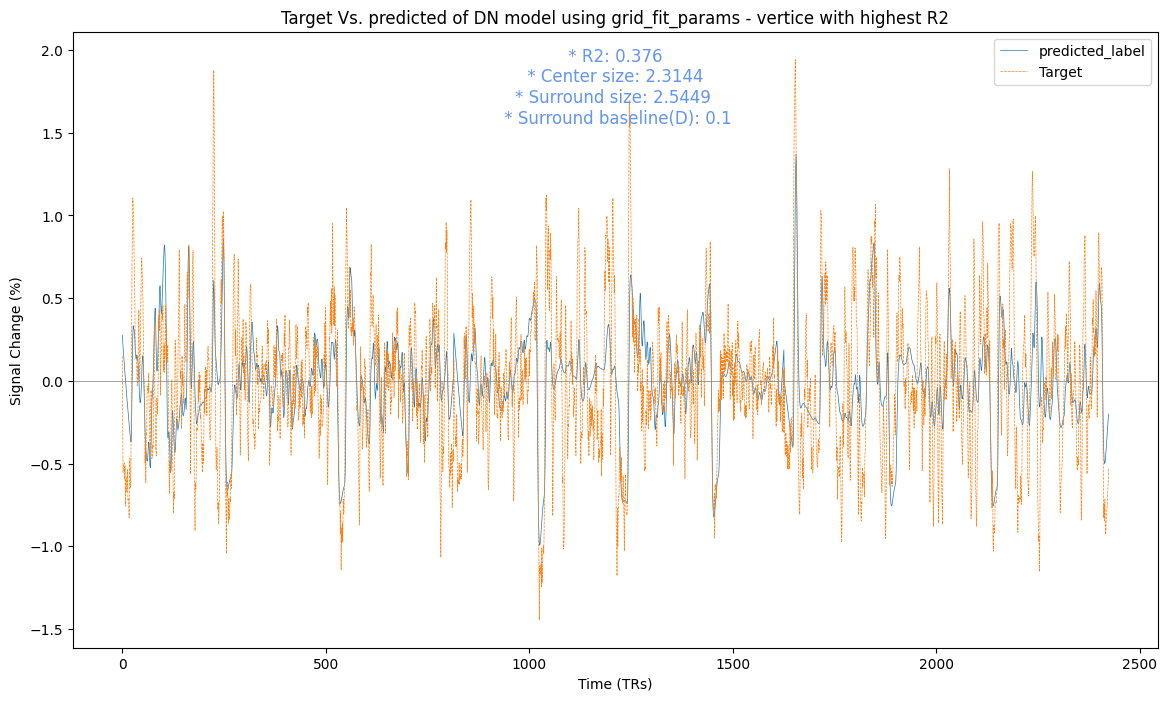

In [141]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value= param_values, fit_type="grid_fit_params")

#### Zoomed plot

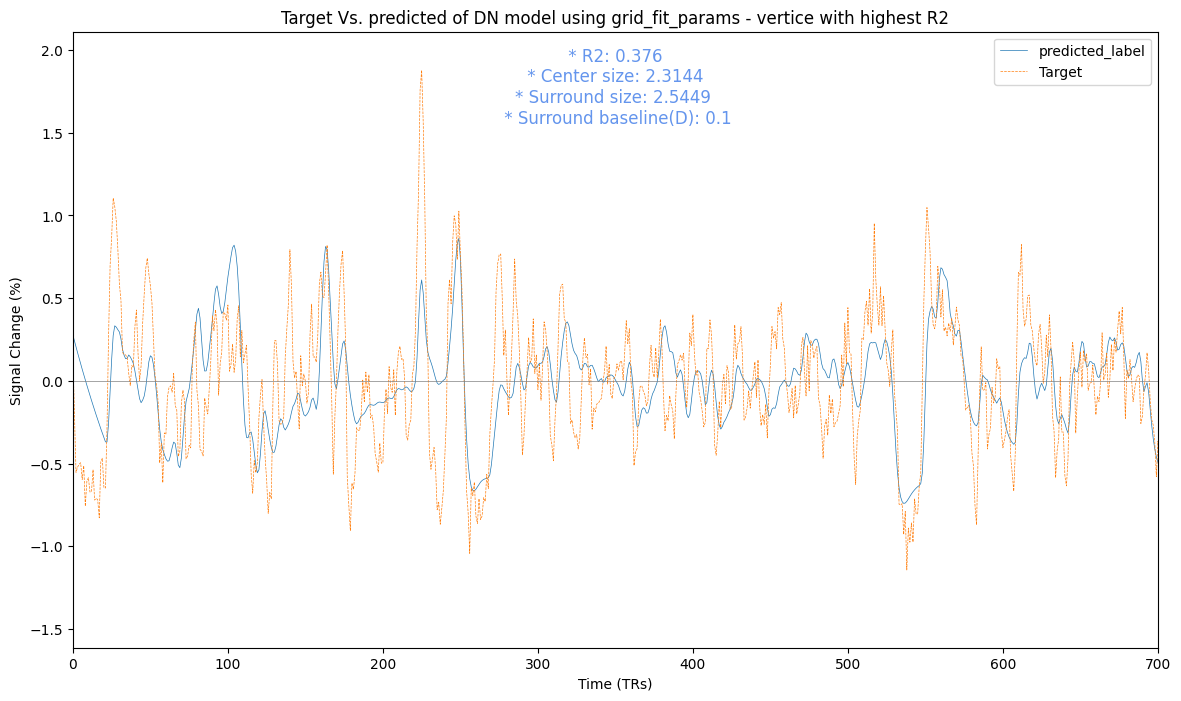

In [142]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value= param_values, fit_type="grid_fit_params", limit_time=700)

### Using the iterative fit on train data

In [143]:

target_time_series = my_analysis.sub.data_train[fold].T[max_r2_iterative_fit]
predicted_time_series = predict_time_series(nm, max_r2_iterative_fit, dn['iterative_search_params'])

In [144]:
param_values_iter = f" * R2: {round(dn['iterative_search_params'][max_r2_iterative_fit][-1], 3)} \n* Center size: {round(dn['iterative_search_params'][max_r2_iterative_fit][1], 4)} \n * Surround size: {round(dn['iterative_search_params'][max_r2_iterative_fit][5], 4)} * Surround baseline(D): {round(dn['iterative_search_params'][max_r2_iterative_fit][-2], 4)}"

##### A zoomed in time-series plot can be found below(next to this one) for a the 0-700 Time segment.

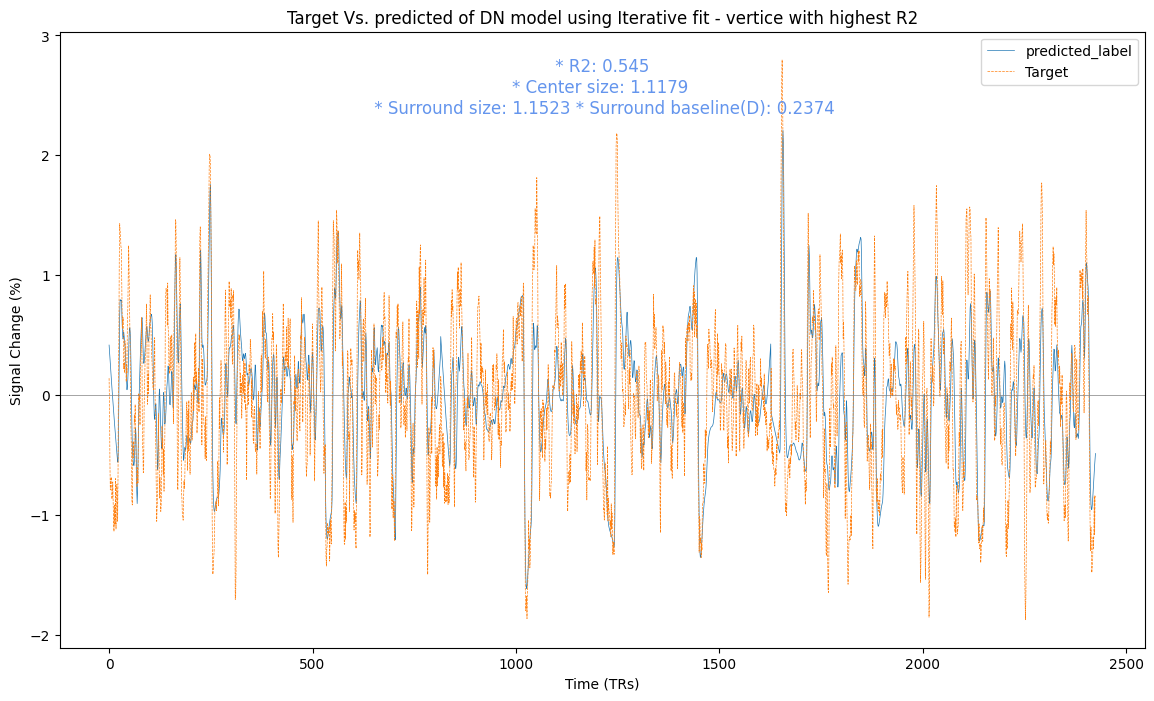

In [145]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value=param_values_iter, fit_type="Iterative fit")

#### Zoomed Plot

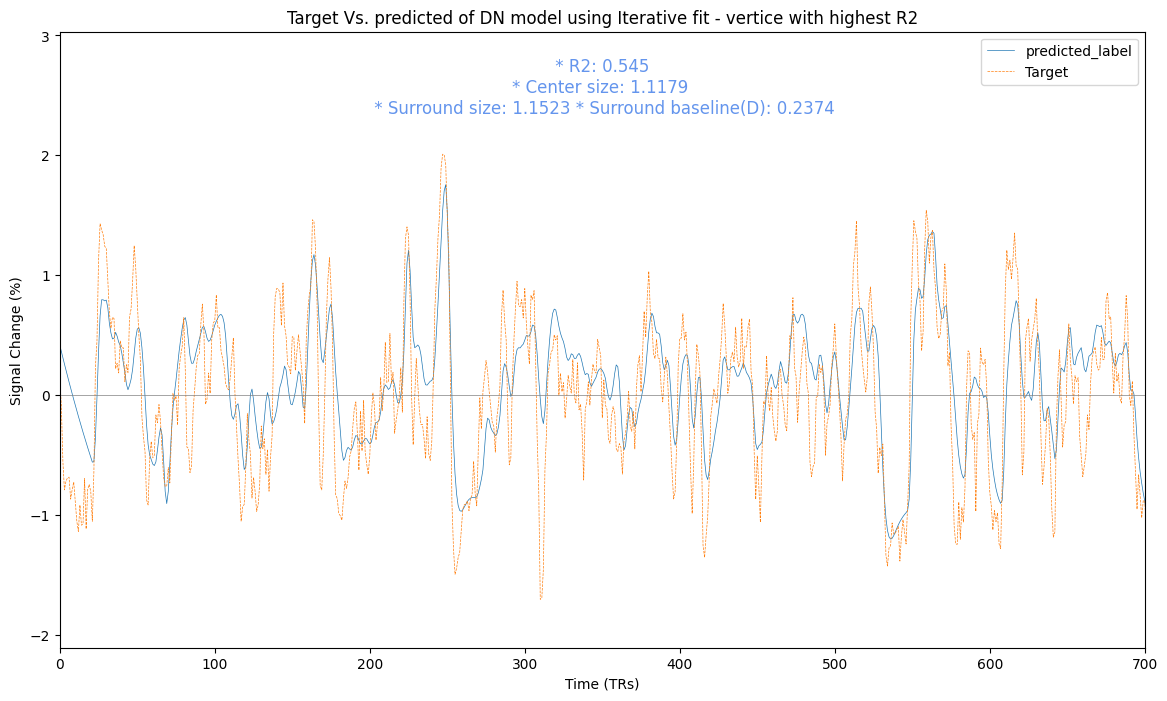

In [146]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value=param_values_iter, fit_type="Iterative fit", limit_time = 700)

### Now using the Test Data - For the best fitting voxel in the test data and using the iterative search param


In [104]:
nm=Norm_Iso1DGaussianModel(test_stim,normalise_RFs=False,filter_predictions=True,filter_type='sg',filter_params=my_analysis.fparams)


nm.stimulus = test_stim
target_time_series = my_analysis.sub.data_test[fold].T[max_r2_test_data]
predicted_time_series = predict_time_series(nm, max_r2_test_data, dn['iterative_search_params'])

In [106]:
param_values_iter = f" * R2: {round(dn['iterative_search_params'][max_r2_test_data][-1], 3)} \n* Center size: {round(dn['iterative_search_params'][max_r2_test_data][1], 4)} \n * Surround size: {round(dn['iterative_search_params'][max_r2_test_data][5], 4)} * Surround baseline(D): {round(dn['iterative_search_params'][max_r2_test_data][-2], 4)}"

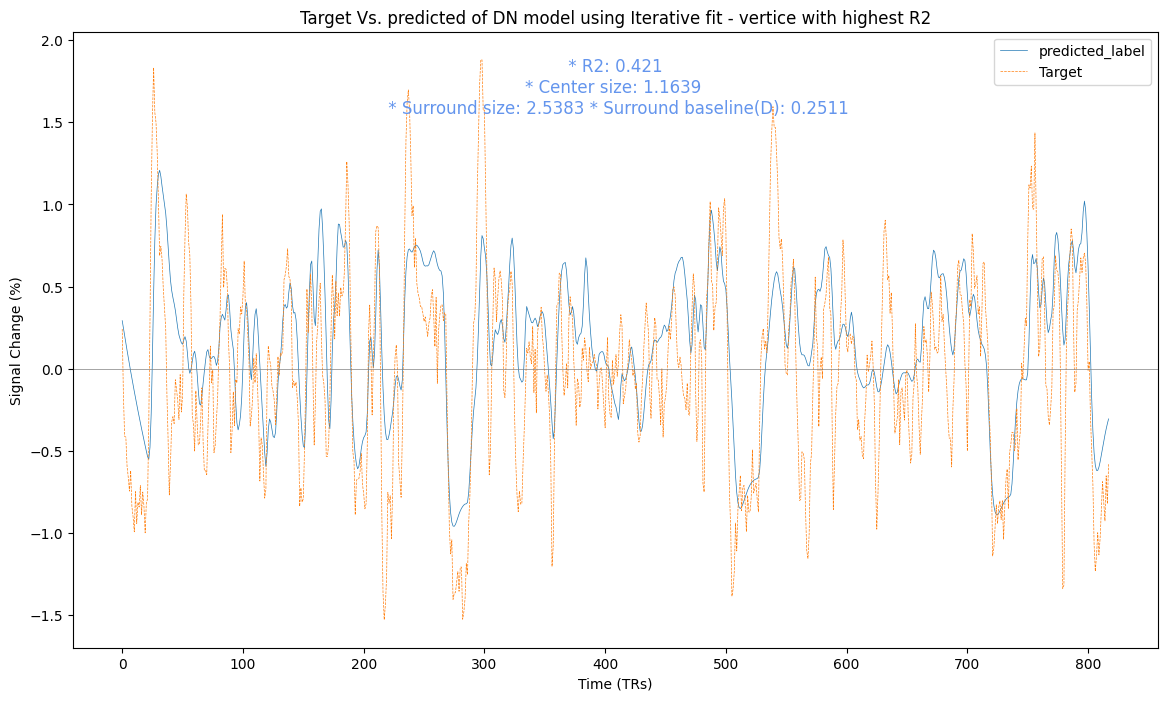

In [107]:
plot_time_series(predicted_time_series, target_time_series, max_r2_test_data, param_value=param_values_iter, fit_type="Iterative fit")

## 4.  A plot of the biggest improvement of the norm model relative to the CSS and gauss model.


#### Find voxel with the biggest r2 difference of DN with css and gaussian models.

for grid fit: DN - gaussian

for iterative fit - DN - gaussian and DN - CSS


In [31]:
max_r2_grid_gf_dn = np.argmax(dn['gridsearch_params'][mask][:, -1] - gm['gridsearch_params'][mask][:, -1])
max_r2_iterative_fit_dn_gf = np.argmax(dn['iterative_search_params'][mask][:, -1]-gm['iterative_search_params'][mask][:, -1])
max_r2_iterative_fit_dn_css = np.argmax(dn['iterative_search_params'][mask][:, -1]-css['iterative_search_params'][mask][:, -1])
max_r2_grid_gf_dn, max_r2_iterative_fit_dn_gf, max_r2_iterative_fit_dn_css

(369, 285, 269)

### Now for each of these vertices show model prediction of all three models.

In [40]:
def plot_time_series_multiple(predicted_dn, target, fit_type, predicted_css = None, predicted_gm = None, R2=[], limit_time=None):
    plt.figure(figsize=(17, 12))
    plt.plot(predicted_dn, label=f"DN - R2: {round(R2[0], 2)} ", linewidth=0.5)
    if predicted_css is not None:
        plt.plot(predicted_css, label=f"CSS - R2: {round(R2[1], 2)}", linewidth=0.5)
    if predicted_gm is not None:
        plt.plot(predicted_gm, label=f"Gaussian - R2: {round(R2[2], 2)}", linewidth=0.5)

    plt.plot(target, label="target", linewidth=0.5, linestyle='dashed', color="black")  
    # plt.text(0.5, 0.95, f'{}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

    plt.title(f'predicted values of models vs. target using {fit_type} for highest R2 difference')
    plt.axhline(0, color='grey', linewidth=0.5)  
    if limit_time is not None:
        plt.xlim([0, limit_time])  


    plt.xlabel('Time (TRs)')
    plt.ylabel('Signal Change (%)')
    plt.legend()
    plt.show()

In [33]:
#create the models
from prfpy.model import Iso1DGaussianModel
from prfpy.model import CSS_Iso1DGaussianModel

In [34]:
nm=Norm_Iso1DGaussianModel(train_stim,normalise_RFs=False,filter_predictions=True,filter_type='sg',filter_params=my_analysis.fparams)
css_model=CSS_Iso1DGaussianModel(train_stim,filter_predictions=my_analysis.filter_predictions,filter_type=my_analysis.filter_type,filter_params=my_analysis.fparams)
gauss_model =Iso1DGaussianModel(train_stim,filter_predictions=my_analysis.filter_predictions,filter_type=my_analysis.filter_type,filter_params=my_analysis.fparams)

### For Improvement of R2 based on grid search params( DN - Gaussian )
(css is omitted here because it doesn't have grid search params)


In [35]:
target_time_series = my_analysis.sub.data_train[fold].T[mask][max_r2_grid_gf_dn]
gf_predictions = predict_time_series(gauss_model, max_r2_grid_gf_dn, gm['gridsearch_params'][mask])
dn_predictions = predict_time_series(nm, max_r2_grid_gf_dn, dn['gridsearch_params'][mask])
gf_predictions, dn_predictions, max_r2_grid_gf_dn

/tank/oso210/projects/prfpy_Nick/prfpy/prfpy/model.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.hrf == 'direct':


(array([ 0.0542638 ,  0.04552192,  0.03688983, ..., -0.06070242,
        -0.05179458, -0.04338834]),
 array([ 0.27622033,  0.24058534,  0.20545931, ..., -0.26581491,
        -0.23276666, -0.20212578]),
 369)

In [36]:
R2 = [dn['gridsearch_params'][mask][max_r2_grid_gf_dn][-1], 0, gm['gridsearch_params'][mask][max_r2_grid_gf_dn][-1]]

#### Now plotting .... Take a look at the second timeseries for a clear and zoomed in for a time range.

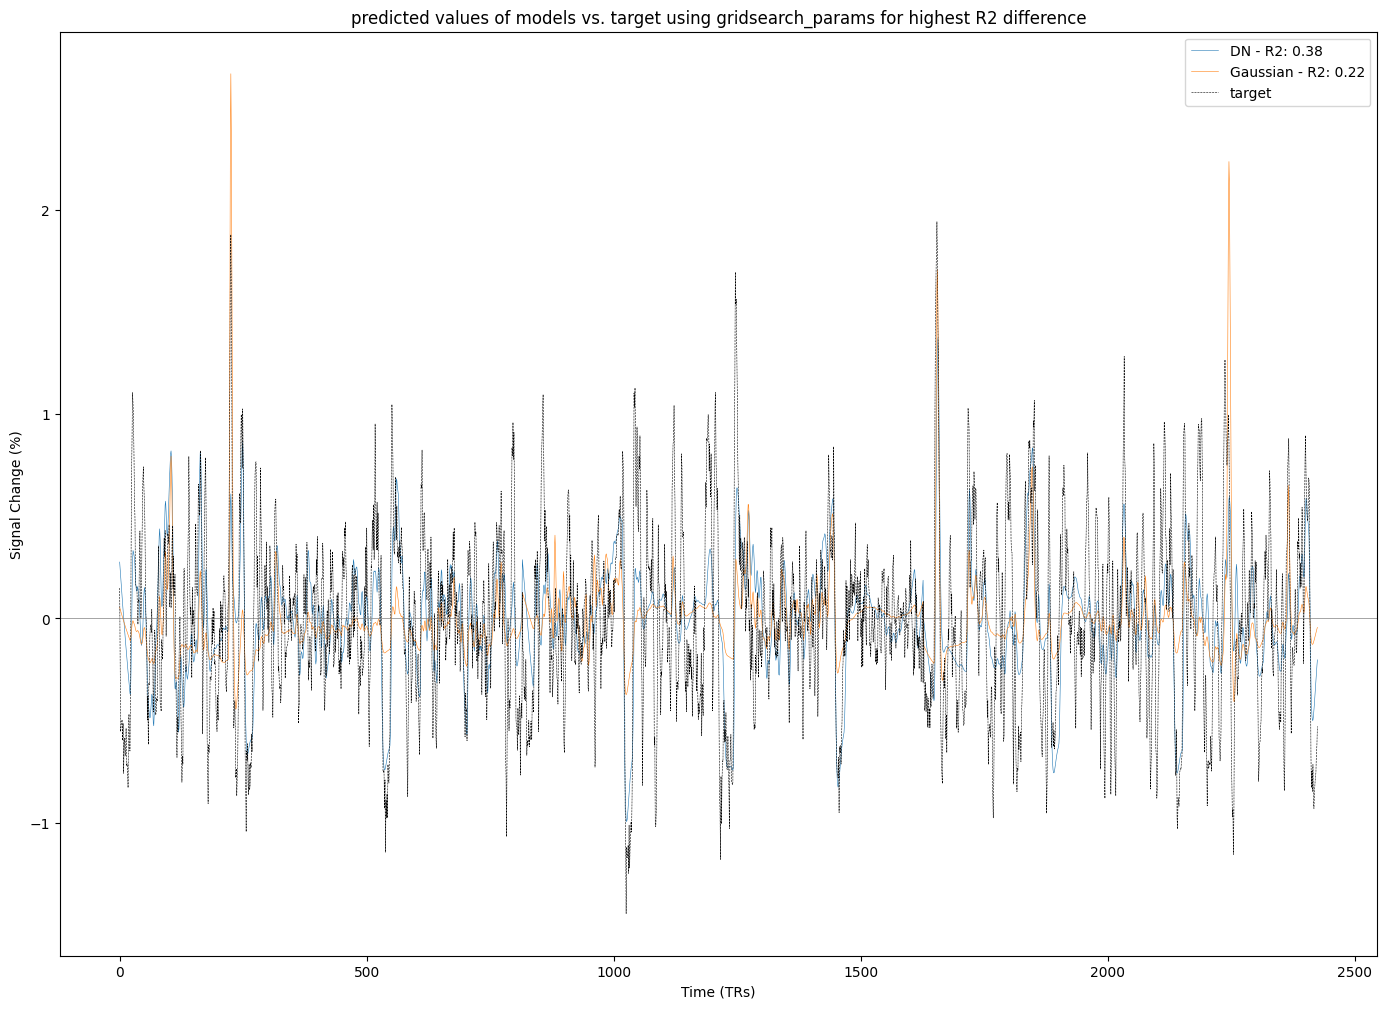

In [37]:
plot_time_series_multiple(target =target_time_series, predicted_dn=dn_predictions, predicted_gm=gf_predictions, fit_type="gridsearch_params",R2=R2 )

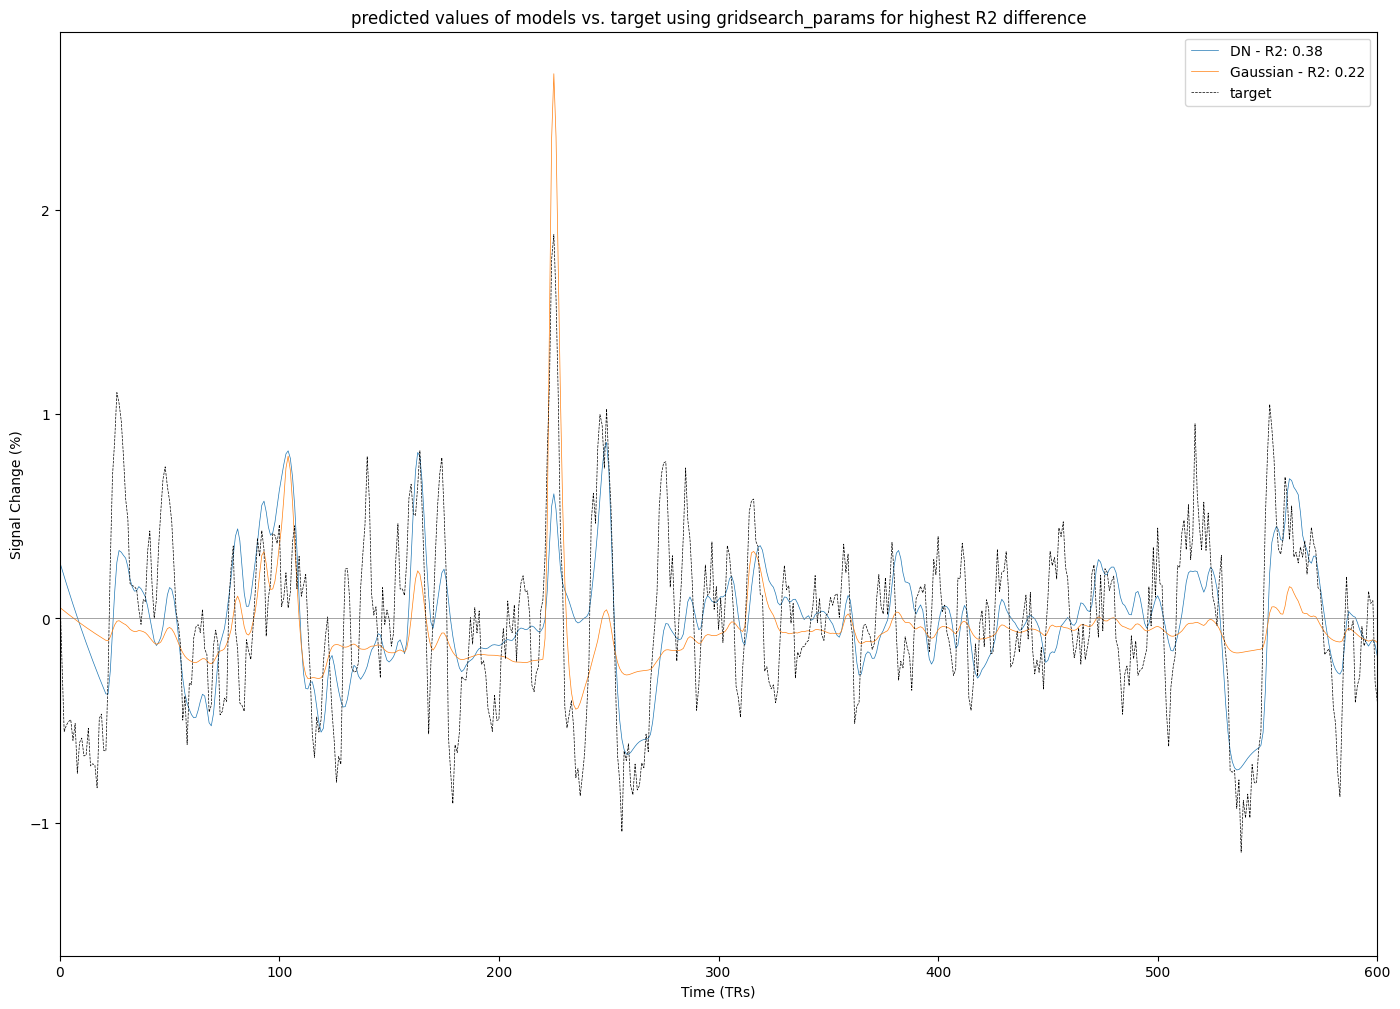

In [41]:
plot_time_series_multiple(target =target_time_series, predicted_dn=dn_predictions, predicted_gm=gf_predictions, fit_type="gridsearch_params",R2=R2, limit_time=600 )

### For Improvement of R2 based on Iterative search params( DN - Gaussian and DN - CSS )


#### For the vertice with a maximum R2 of Divisive normalisation - Gaussian

In [ ]:
target_time_series_dn_gf = my_analysis.sub.data_train[fold].T[mask][max_r2_iterative_fit_dn_gf]
gf_predictions_iter = predict_time_series(gauss_model, max_r2_iterative_fit_dn_gf, gm['iterative_search_params'][mask])
css_predictions_iter = predict_time_series(css_model, max_r2_iterative_fit_dn_gf, css['iterative_search_params'][mask])
dn_predictions_iter = predict_time_series(nm, max_r2_iterative_fit_dn_gf, dn['iterative_search_params'][mask])
gf_predictions_iter,css_predictions_iter, dn_predictions_iter, max_r2_iterative_fit_dn_gf


In [43]:
R2_iter_dn_gf = [dn['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1], css['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1], gm['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1]]

#### Now plotting model predictions and target for the voxel with highest R2 for DN - Gauss ... Take a look at the second timeseries for a clear and zoomed view of a time range.

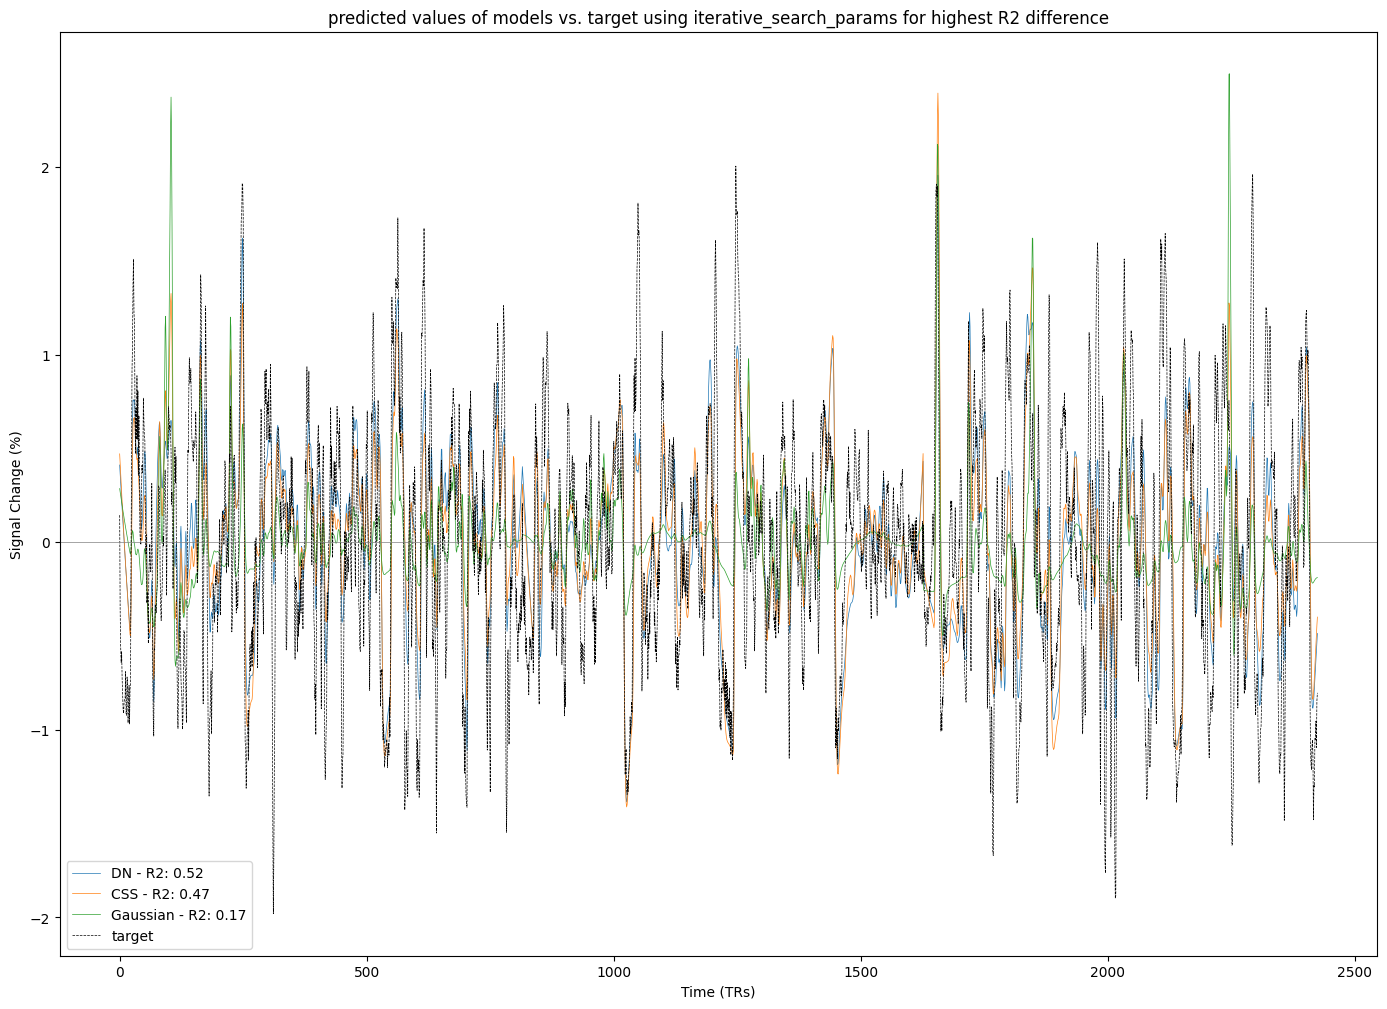

In [44]:
plot_time_series_multiple(target =target_time_series_dn_gf, predicted_css=css_predictions_iter, predicted_dn=dn_predictions_iter, predicted_gm=gf_predictions_iter, fit_type="iterative_search_params",R2=R2_iter_dn_gf )

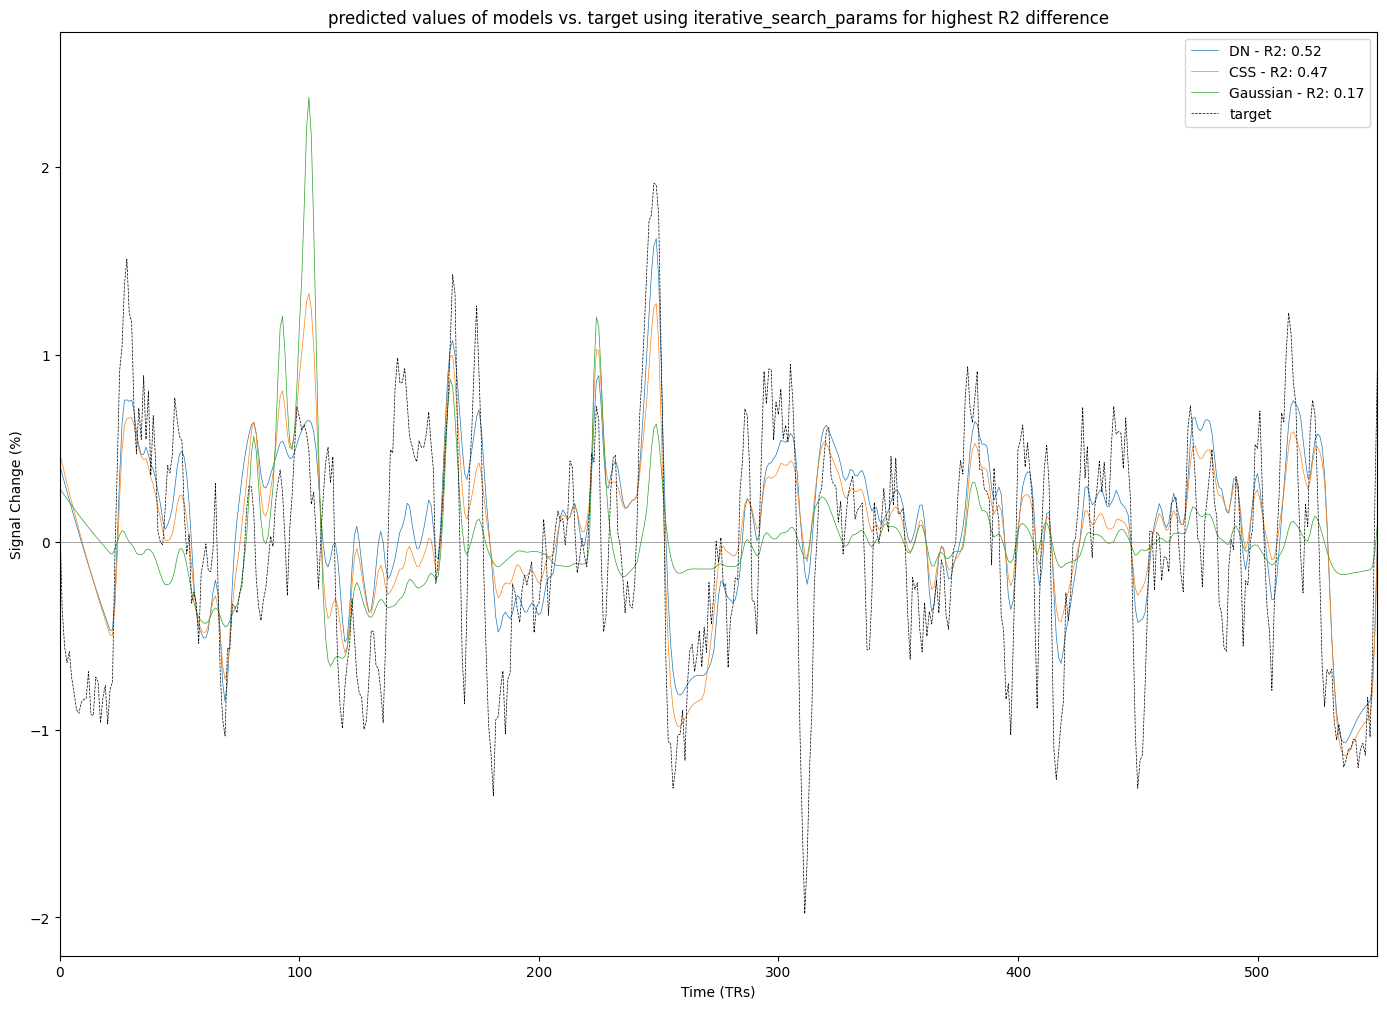

In [47]:
plot_time_series_multiple(target =target_time_series_dn_gf, predicted_dn=dn_predictions_iter, predicted_css=css_predictions_iter, predicted_gm=gf_predictions_iter, fit_type="iterative_search_params",R2=R2_iter_dn_gf, limit_time=550 )

#### Now let's do the same for the vertice with a maximum value of difference in R2 of the Divisive normalisation and the CSS model.

In [ ]:
css_model.stimulus = train_stim
target_time_series_dn_css = my_analysis.sub.data_train[fold].T[mask][max_r2_iterative_fit_dn_css]
gf_predictions_iter_ = predict_time_series(gauss_model, max_r2_iterative_fit_dn_css, gm['iterative_search_params'][mask])
css_predictions_iter_ = predict_time_series(css_model, max_r2_iterative_fit_dn_css, css['iterative_search_params'][mask])
dn_predictions_iter_ = predict_time_series(nm, max_r2_iterative_fit_dn_css, dn['iterative_search_params'][mask])
gf_predictions_iter_,css_predictions_iter_, dn_predictions_iter_, max_r2_iterative_fit_dn_css


In [49]:
R2_iter_dn_css = [dn['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1], css['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1], gm['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1]]

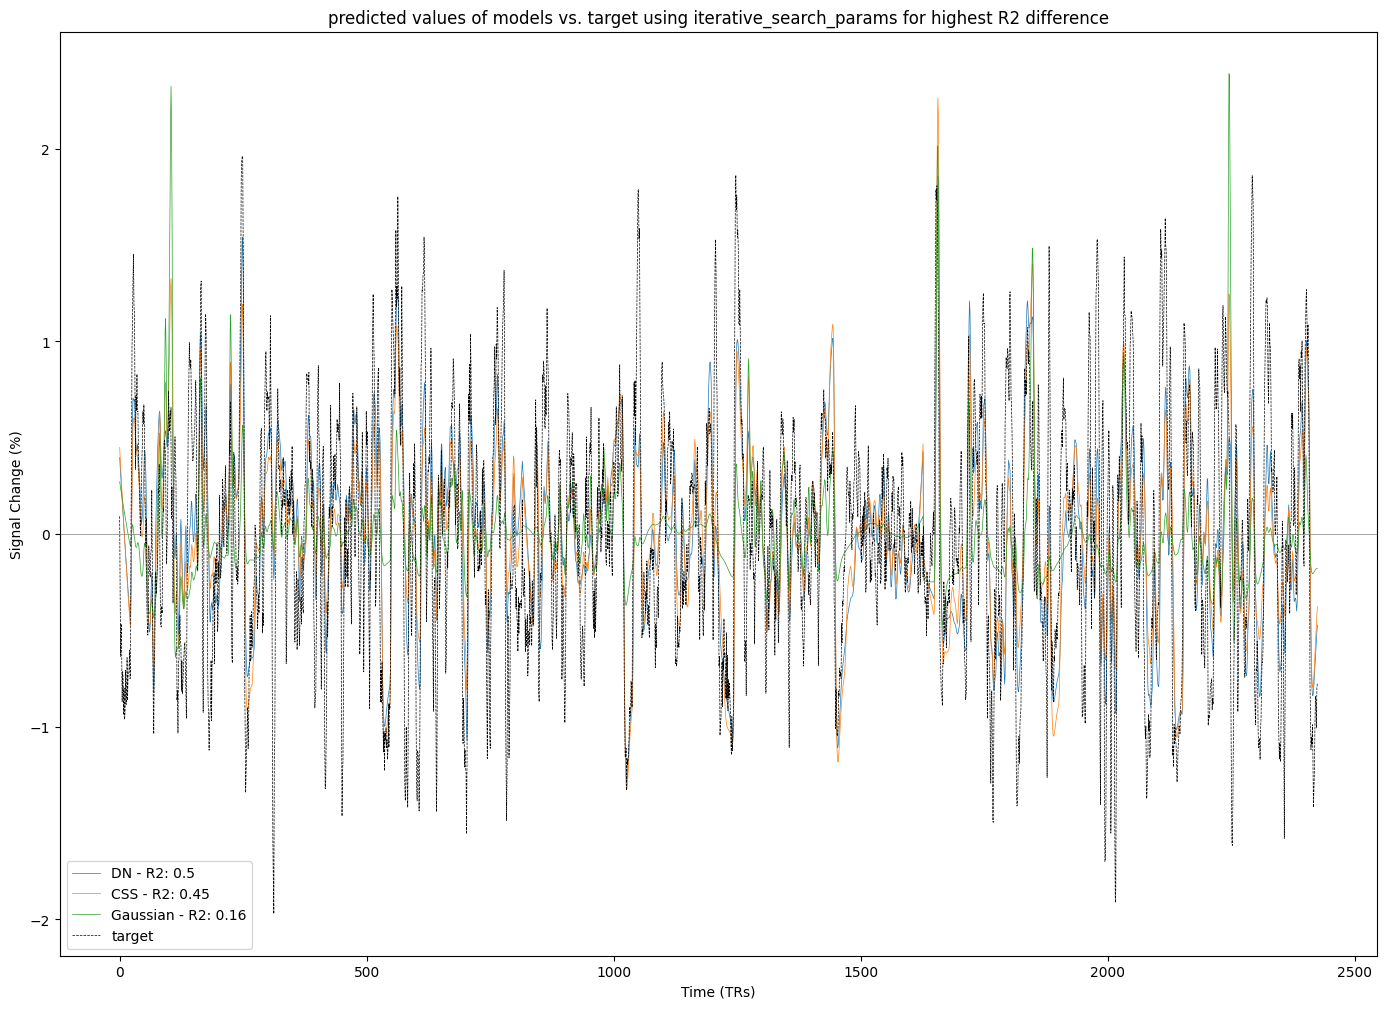

In [50]:
plot_time_series_multiple(target =target_time_series_dn_css, predicted_css=css_predictions_iter_, predicted_dn=dn_predictions_iter_, predicted_gm=gf_predictions_iter_, fit_type="iterative_search_params",R2=R2_iter_dn_css)

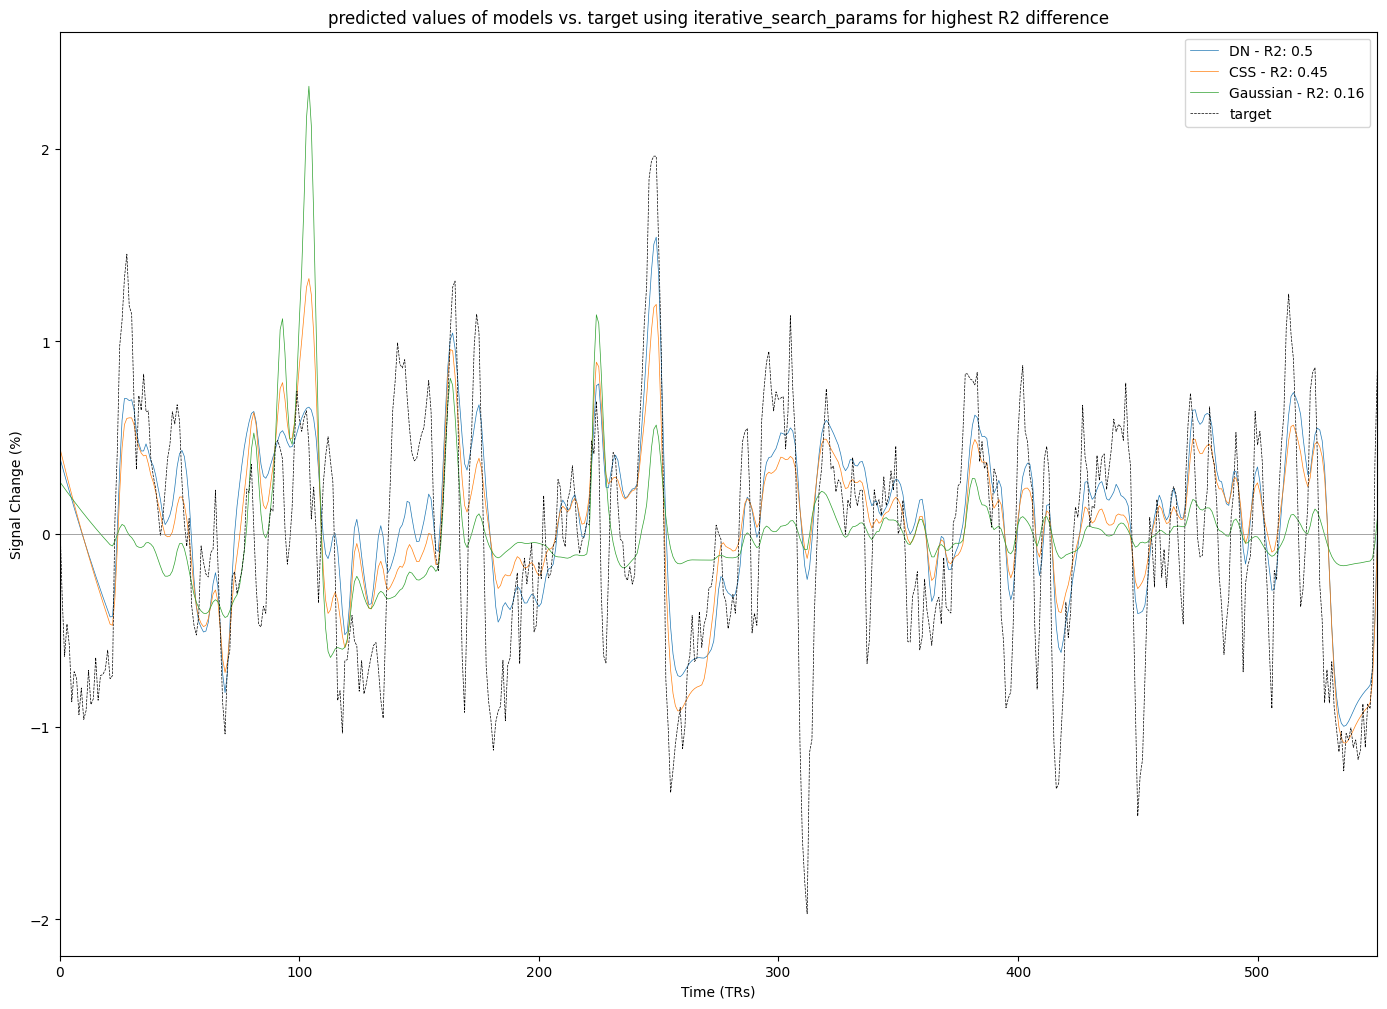

In [51]:
plot_time_series_multiple(target =target_time_series_dn_css, predicted_css=css_predictions_iter_, predicted_dn=dn_predictions_iter_, predicted_gm=gf_predictions_iter_, fit_type="iterative_search_params",R2=R2_iter_dn_css, limit_time=550)

## Biggest improvement for the test data -- using the highest r2 difference from the test data and timeseries using iterative search params

##### Get the maximum difference in R^2 == DN - CSS

In [52]:
def argmax_diff_with_zero_check(x, y):
    next_count = 0

    while True:
        diff = x - y
        max_diff_index = np.argmax(diff)

        if y[max_diff_index] == 0:
            x[max_diff_index] = 0
            next_count += 1
        else:
            break

    return max_diff_index, next_count

In [53]:
## To avoid vertices with highest r2 difference just because css's r2 was 0
max_r2_test_dn_css, next_count = argmax_diff_with_zero_check(dn['CV_rsq'][mask], css['CV_rsq'][mask])
max_r2_test_dn_css, next_count

(25, 12)

In [54]:
nm=Norm_Iso1DGaussianModel(test_stim,normalise_RFs=False,filter_predictions=True,filter_type='sg',filter_params=my_analysis.fparams)


In [55]:
css_model=CSS_Iso1DGaussianModel(test_stim,filter_predictions=my_analysis.filter_predictions,filter_type=my_analysis.filter_type,filter_params=my_analysis.fparams)
gauss_model =Iso1DGaussianModel(test_stim,filter_predictions=my_analysis.filter_predictions,filter_type=my_analysis.filter_type,filter_params=my_analysis.fparams)

In [ ]:
target_time_series_test = my_analysis.sub.data_test[fold].T[mask][max_r2_test_dn_css]
gf_predictions_test = predict_time_series(gauss_model, max_r2_test_dn_css, gm['iterative_search_params'][mask])
css_predictions_test = predict_time_series(css_model, max_r2_test_dn_css, css['iterative_search_params'][mask])
dn_predictions_test = predict_time_series(nm, max_r2_test_dn_css, dn['iterative_search_params'][mask])
gf_predictions_test,css_predictions_test, dn_predictions_test, max_r2_test_dn_css


In [57]:
R2_iter_dn_gf = [dn['CV_rsq'][mask][max_r2_test_dn_css], css['CV_rsq'][mask][max_r2_test_dn_css], gm['CV_rsq'][mask][max_r2_test_dn_css]]

#### Now plotting model predictions and target for the voxel with highest R2 for DN - CSS according to the test data...

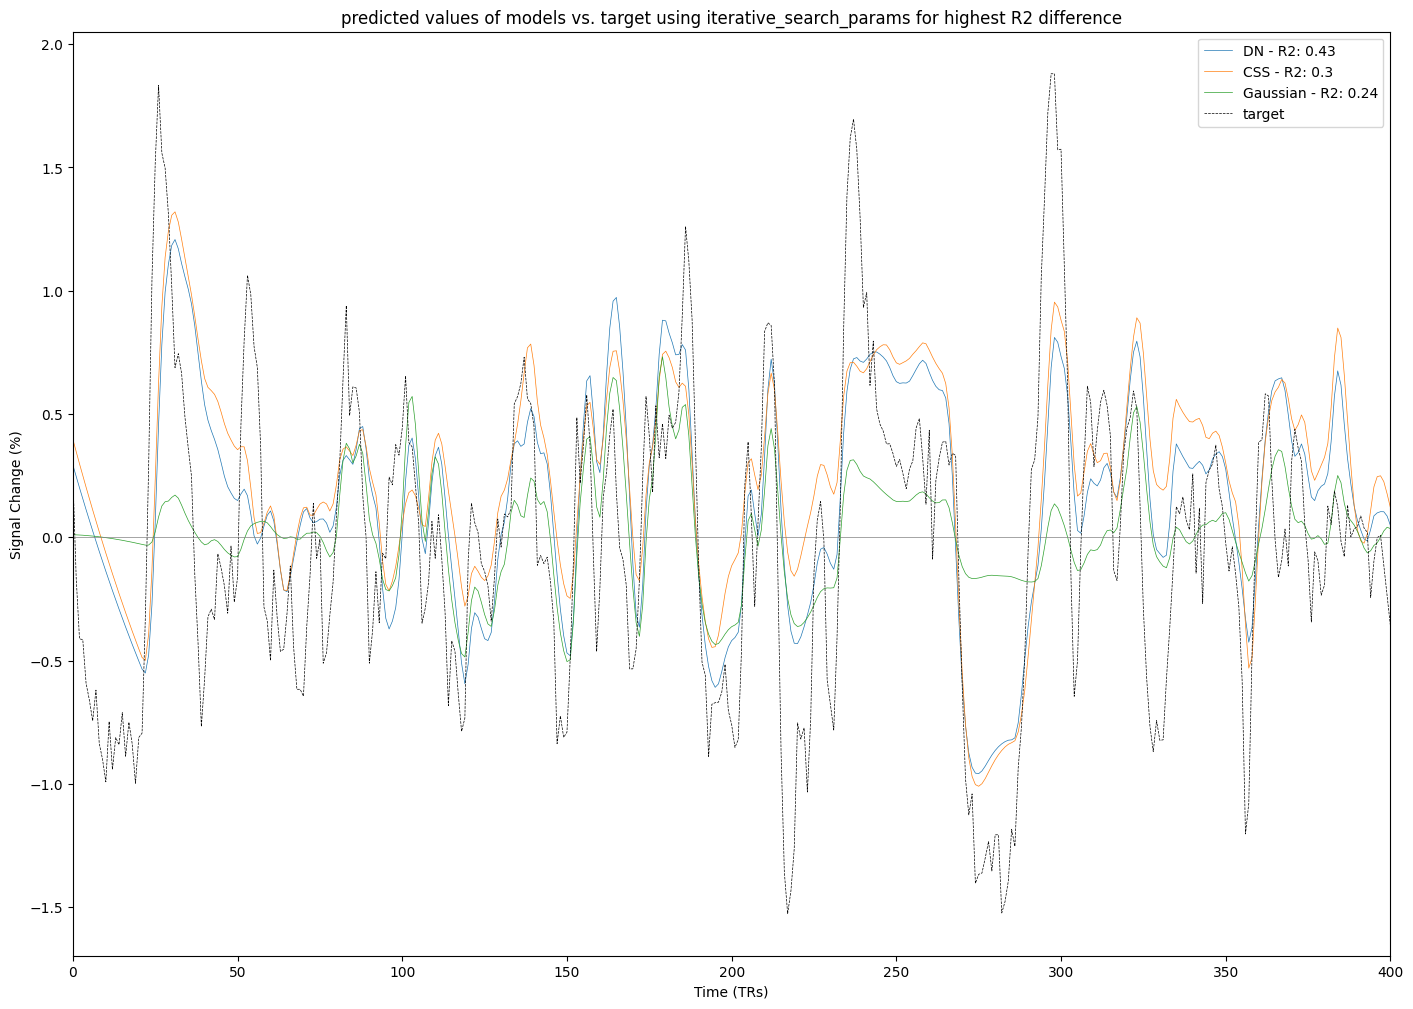

In [60]:
plot_time_series_multiple(target =target_time_series_test, predicted_css=css_predictions_test, predicted_dn=dn_predictions_test, predicted_gm=gf_predictions_test, fit_type="iterative_search_params",R2=R2_iter_dn_gf, limit_time=400)